<a href="https://colab.research.google.com/github/HelenMargfoy/Parcial2/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad de los Andes
###👨‍🏫 Profesores
Profesor Magistral: Camilo Vega Barbosa

Profesor complementario: Sergio Julian Zona Moreno

### Estudiantes:
Helen Melissa Margfoy Contreras, Estudiante de Economía y Gobierno y asuntos Públicos Universidad de Los Andes

Cristian Oviedo, Estudiante de economía Universidad de Los Andes

Tomás Acevedo Echeverría, Estudiante de economía Universidad de Los Andes

Andres Felipe Ballén Caceres, Estudiante de economía Universidad de Los Andes

### Instalación de Bibliotecas y Carga del Dataset

En esta sección se realiza la instalación de todas las bibliotecas necesarias para trabajar. También se trae el dataset desde Kaggle.

In [ ]:
# Instalación silenciosa de librerías
# Frameworks de Deep Learning
!pip install -q tensorflow
!pip install -q torch
!pip install -q keras
!pip install -q keras-tuner

# Análisis y manipulación de datos
!pip install -q pandas
!pip install -q numpy
!pip install -q scikit-learn
!pip install -q scipy
!pip install -q statsmodels

# Visualización
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly

# Optimización y evaluación
!pip install -q optuna
!pip install -q tensorboard
!pip install -q scikit-optimize

# Utilidades
!pip install -q tqdm
!pip install -q joblib

# Análisis exploratorio y acceso a datos
!pip install -q ydata-profiling
!pip install -q datasets
!pip install -q kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!mkdir -p ~/.kaggle
!echo '{"username":"cristianoviedo25","key":"648f6334fbe0827dc8cdcf6698c39c7f"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sazidthe1/world-gdp-data

Dataset URL: https://www.kaggle.com/datasets/sazidthe1/world-gdp-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 46.3MB/s]


In [ ]:
ROOT_DIR = '/content'
DATASET_NAME = 'world-gdp-data'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  world-gdp-data.zip
  inflating: /content/world-gdp-data/country_codes.csv  
  inflating: /content/world-gdp-data/gdp_data.csv  


In [ ]:
!kaggle datasets download imtkaggleteam/global-education -p ./data
!unzip ./data/global-education.zip -d ./data/education

Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/global-education
License(s): other
  0% 0.00/196k [00:00<?, ?B/s]
100% 196k/196k [00:00<00:00, 65.2MB/s]
Archive:  ./data/global-education.zip
  inflating: ./data/education/1- share-of-the-world-population-with-at-least-basic-education.csv  
  inflating: ./data/education/2- learning-adjusted-years-of-school-lays.csv  
  inflating: ./data/education/3- number-of-out-of-school-children.csv  
  inflating: ./data/education/4- gender-gap-education-levels.csv  


## 1. **Explicación del dataset**


Este estudio analiza los factores que determinan el nivel de desarrollo económico de un país, clasificando su PIB en tres categorías: bajo, medio y alto (variable dependiente). Para ello, se han combinado datos del PIB por país y año (gdp_data.csv), la clasificación de países según su región y grupo de ingreso (country_codes.csv), y los años de escolaridad ajustados por aprendizaje (learning-adjusted-years-of-schooling.csv). Las variables independientes incluyen la región geográfica, el grupo de ingreso y el nivel educativo de cada país, con el objetivo de identificar patrones y relaciones entre la educación, la clasificación económica y el nivel de PIB. Este análisis permitirá comprender mejor cómo la riqueza nacional está influenciada por factores educativos y estructurales.

La base de datos cuenta con el siguiente conjunto de variables sobre la el PIB y los años de estudio:

| *Variable*                          | *Descripción*                                                                                                                                                 |
|---------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| *country_code*                      | Código único que identifica a cada país (ej.: "USA", "CAN"). Se utiliza para unir los diferentes datasets.                                                      |
| *country_name*                      | Nombre completo del país (ej.: "United States", "Canada").                                                                                                     |
| *region*                            | Región geográfica a la que pertenece el país (ej.: "Asia", "Europa").                                                                                            |
| *income_group*                      | Clasificación económica del país según su nivel de ingresos (ej.: "High income", "Low income").                                                                    |
| *gdp_1960 – gdp_2022*                 | Valores anuales del Producto Interno Bruto (PIB) desde 1960 hasta 2022, obtenidos tras pivotear los datos originales.                                               |
| *learning_years2010*                | Años ajustados de escolaridad para el año 2010, que reflejan la duración y la calidad educativa.                                                                   |
| *learning_years2017*                | Años ajustados de escolaridad para el año 2017.                                                                                                                   |
| *learning_years2018*                | Años ajustados de escolaridad para el año 2018.                                                                                                                   |
| *learning_years2020*                | Años ajustados de escolaridad para el año 2020.                                                                                                                   |
| *pib_promedio*                      | Promedio del PIB calculado a partir de los valores de los años recientes (2018–2021). Se usa para establecer un ranking económico entre países.                |
| *country_code_num*                  | Identificador numérico asignado a cada país, basado en el ranking obtenido a partir de "pib_promedio".                                                               |
| *region_0, region_1, …*               | Variables binarias derivadas de aplicar OneHotEncoder a "region". Cada columna indica (0 o 1) la pertenencia a una región específica.                           |
| *income_group_num*                  | Valor numérico obtenido mediante label encoding de "income_group", facilitando su uso en análisis y modelos numéricos.                                             |
| *country_name_num*                  | Representación numérica del nombre del país, que en este caso es igual a "country_code_num".                                                                       |
| *GDP_Low*                           | Indicador binario que señala si el PIB del año 2022 se encuentra en la categoría baja (por debajo del percentil 33.3).                                             |
| *GDP_Medium*                        | Indicador binario que señala si el PIB del año 2022 se encuentra en la categoría media (entre los percentiles 33.3 y 66.6).                                        |
| *GDP_High*                          | Indicador binario que señala si el PIB del año 2022 se encuentra en la categoría alta (por encima del percentil 66.6).                                             |

Con las bases ya importadas, las cargamos, pivoteamos y unimos.

In [ ]:
import pandas as pd

# Cargar los datasets
country_codes = pd.read_csv('/content/world-gdp-data/country_codes.csv')
gdp_data = pd.read_csv('/content/world-gdp-data/gdp_data.csv')
education_data = pd.read_csv('/content/data/education/2- learning-adjusted-years-of-school-lays.csv')

# Verificar la estructura de los datasets
print("Country Codes Dataset:")
print(country_codes.head())
print("\nGDP Data Dataset:")
print(gdp_data.head())
print("\nLearning-Adjusted School Years:")
print(education_data.head())

# Transformar gdp_data de formato largo a formato ancho
# Pivoteamos para tener años como columnas y valores de GDP como valores
gdp_wide = gdp_data.pivot(index='country_code', columns='year', values='value')
gdp_wide.columns = [f'gdp_{year}' for year in gdp_wide.columns]  # Renombrar columnas para claridad
gdp_wide = gdp_wide.reset_index()  # Convertir el índice country_code a columna

# Unir los datasets por country_code
final_data_m = pd.merge(country_codes, gdp_wide, on='country_code', how='left')

# Añadir los nombres de países desde gdp_data a final_data
# Primero creamos un dataframe con pares únicos de country_code y country_name
country_names = gdp_data[['country_code', 'country_name']].drop_duplicates()
# Luego hacemos la unión
final_data_m = pd.merge(final_data_m, country_names, on='country_code', how='left')

# Base de datos de años de educación ajustados por aprendizaje.
# Renombrar las columnas para que coincidan con la nomenclatura de final_data
education_data = education_data.rename(columns={
    'Entity': 'country_name',
    'Code': 'country_code',
    'Year': 'year',
    'Learning-Adjusted Years of School': 'learning_adjusted_years'
})

# Primero, veamos cuántos duplicados hay / Notamos que había duplicados en la db de educación porque aparecía ese error
duplicados = education_data.duplicated(subset=['country_code', 'year'], keep=False)
print(f"Se encontraron {duplicados.sum()} registros duplicados")

# Resolver los duplicados tomando el promedio para cada combinación de país y año
education_data_sin_dup = education_data.groupby(['country_code', 'year']).agg({
    'learning_adjusted_years': 'mean'
}).reset_index()

# Ahora pivotear sin problemas de duplicados
education_wide = education_data_sin_dup.pivot(
    index='country_code',
    columns='year',
    values='learning_adjusted_years'
)

# Renombrar las columnas
education_wide.columns = [f'learning_years{int(year)}' for year in education_wide.columns]

# Resetear el índice para tener country_code como columna
education_wide = education_wide.reset_index()

# Unir con la base principal
final_data = pd.merge(
    final_data_m,
    education_wide,
    on='country_code',
    how='left'
)

# Verificar el resultado
print("\nPrimeras filas del dataset final:")
print(final_data.head())

# Guardar el dataset final
final_data.to_csv('final_data.csv', index=False)

# Mostrar el dataset final con las tres bases unidas

final_data.columns = final_data.columns.str.strip()
print("\nFinal Merged Dataset:")
final_data

Country Codes Dataset:
  country_code                     region         income_group
0          ABW  Latin America & Caribbean          High income
1          AFG                 South Asia           Low income
2          AGO         Sub-Saharan Africa  Lower middle income
3          ALB      Europe & Central Asia  Upper middle income
4          AND      Europe & Central Asia          High income

GDP Data Dataset:
  country_name country_code  year        value
0  Afghanistan          AFG  1960  537777811.1
1  Afghanistan          AFG  1961  548888895.6
2  Afghanistan          AFG  1962  546666677.8
3  Afghanistan          AFG  1963  751111191.1
4  Afghanistan          AFG  1964  800000044.4

Learning-Adjusted School Years:
        Entity Code  Year  Learning-Adjusted Years of School
0  Afghanistan  AFG  2017                           4.870000
1  Afghanistan  AFG  2018                           4.949788
2  Afghanistan  AFG  2020                           5.052838
3       Africa  NaN  

country_code                      region         income_group  \
0            ABW   Latin America & Caribbean          High income   
1            AFG                  South Asia           Low income   
2            AGO          Sub-Saharan Africa  Lower middle income   
3            ALB       Europe & Central Asia  Upper middle income   
4            AND       Europe & Central Asia          High income   
..           ...                         ...                  ...   
212          XKX       Europe & Central Asia  Upper middle income   
213          YEM  Middle East & North Africa           Low income   
214          ZAF          Sub-Saharan Africa  Upper middle income   
215          ZMB          Sub-Saharan Africa  Lower middle income   
216          ZWE          Sub-Saharan Africa  Lower middle income   

         gdp_1960      gdp_1961      gdp_1962      gdp_1963      gdp_1964  \
0             NaN           NaN           NaN           NaN           NaN   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2             NaN           NaN           NaN           NaN           NaN   
3             NaN           NaN           NaN           NaN           NaN   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
212           NaN           NaN           NaN           NaN           NaN   
213           NaN           NaN           NaN           NaN           NaN   
214  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10  1.195600e+10   
215  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
216  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

         gdp_1965      gdp_1966  ...      gdp_2018      gdp_2019  \
0             NaN           NaN  ...  3.276188e+09  3.395794e+09   
1    1.006667e+09  1.400000e+09  ...  1.841886e+10  1.890450e+10   
2             NaN           NaN  ...  7.779294e+10  6.930911e+10   
3             NaN           NaN  ...  1.515642e+10  1.540183e+10   
4             NaN           NaN  ...  3.218420e+09  3.155149e+09   
..            ...           ...  ...           ...           ...   
212           NaN           NaN  ...  7.878763e+09  7.899741e+09   
213           NaN           NaN  ...  2.160616e+10           NaN   
214  1.306899e+10  1.421139e+10  ...  4.040000e+11  3.890000e+11   
215  1.082857e+09  1.264286e+09  ...  2.631151e+10  2.330867e+10   
216  1.311436e+09  1.281750e+09  ...  3.415607e+10  2.183223e+10   

         gdp_2020      gdp_2021      gdp_2022  country_name  \
0    2.610039e+09  3.126019e+09           NaN         Aruba   
1    2.014345e+10  1.458314e+10           NaN   Afghanistan   
2    5.024137e+10  6.568544e+10  1.070000e+11        Angola   
3    1.516273e+10  1.793057e+10  1.888210e+10       Albania   
4    2.891001e+09  3.325145e+09  3.352033e+09       Andorra   
..            ...           ...           ...           ...   
212  7.717143e+09  9.412034e+09  9.429156e+09        Kosovo   
213           NaN           NaN           NaN   Yemen, Rep.   
214  3.380000e+11  4.190000e+11  4.060000e+11  South Africa   
215  1.811064e+10  2.214765e+10  2.978445e+10        Zambia   
216  2.150970e+10  2.837124e+10  2.067806e+10      Zimbabwe   

     learning_years2010  learning_years2017  learning_years2018  \
0                   NaN                 NaN                 NaN   
1                   NaN                4.87            4.949788   
2                   NaN                4.11            4.234978   
3              7.382478                8.92            8.851396   
4                   NaN                 NaN                 NaN   
..                  ...                 ...                 ...   
212                 NaN                 NaN                 NaN   
213                 NaN                4.13            4.178762   
214            6.235707                5.11            5.570013   
215   

## 2. Arreglar los datos para que sean numéricos y no tengan valores faltantes

#### Llenar con -1 los NaN

In [ ]:
import numpy as np

# Primero, seleccionar solo las columnas de PIB
gdp_cols = [f'gdp_{year}' for year in range(1960, 2023)]

# Aplicar fillna(-1) solamente a esas columnas
final_data[gdp_cols] = final_data[gdp_cols].fillna(-1)

# Selecciona solo las columnas de years
learning_years_cols = [f'learning_years{year}' for year in (2010, 2017, 2018, 2020)]

# Aplicar fillna(-1) solamente a esas columnas
final_data[learning_years_cols] = final_data[learning_years_cols].fillna(-1)

# Verifica que solo las columnas de PIB tienen -1 para valores faltantes
print(f"Columnas de PIB con valores -1: {final_data[gdp_cols].isin([-1]).any().sum()}")

# Verifica que solo las columnas de PIB tienen -1 para valores faltantes
print(f"Columnas de años de estudio con valores -1: {final_data[learning_years_cols].isin([-1]).any().sum()}")

# Verifica que columns como country_name ya no tengan -1
print(f"Países con country_name igual a -1: {(final_data['country_name'] == -1).sum()}")

Columnas de PIB con valores -1: 63
Columnas de años de estudio con valores -1: 4
Países con country_name igual a -1: 0


Revisamos cómo se ve la base hasta el momento.

In [ ]:
final_data

country_code                      region         income_group  \
0            ABW   Latin America & Caribbean          High income   
1            AFG                  South Asia           Low income   
2            AGO          Sub-Saharan Africa  Lower middle income   
3            ALB       Europe & Central Asia  Upper middle income   
4            AND       Europe & Central Asia          High income   
..           ...                         ...                  ...   
212          XKX       Europe & Central Asia  Upper middle income   
213          YEM  Middle East & North Africa           Low income   
214          ZAF          Sub-Saharan Africa  Upper middle income   
215          ZMB          Sub-Saharan Africa  Lower middle income   
216          ZWE          Sub-Saharan Africa  Lower middle income   

         gdp_1960      gdp_1961      gdp_1962      gdp_1963      gdp_1964  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10  1.195600e+10   
215  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
216  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

         gdp_1965      gdp_1966  ...      gdp_2018      gdp_2019  \
0   -1.000000e+00 -1.000000e+00  ...  3.276188e+09  3.395794e+09   
1    1.006667e+09  1.400000e+09  ...  1.841886e+10  1.890450e+10   
2   -1.000000e+00 -1.000000e+00  ...  7.779294e+10  6.930911e+10   
3   -1.000000e+00 -1.000000e+00  ...  1.515642e+10  1.540183e+10   
4   -1.000000e+00 -1.000000e+00  ...  3.218420e+09  3.155149e+09   
..            ...           ...  ...           ...           ...   
212 -1.000000e+00 -1.000000e+00  ...  7.878763e+09  7.899741e+09   
213 -1.000000e+00 -1.000000e+00  ...  2.160616e+10 -1.000000e+00   
214  1.306899e+10  1.421139e+10  ...  4.040000e+11  3.890000e+11   
215  1.082857e+09  1.264286e+09  ...  2.631151e+10  2.330867e+10   
216  1.311436e+09  1.281750e+09  ...  3.415607e+10  2.183223e+10   

         gdp_2020      gdp_2021      gdp_2022  country_name  \
0    2.610039e+09  3.126019e+09 -1.000000e+00         Aruba   
1    2.014345e+10  1.458314e+10 -1.000000e+00   Afghanistan   
2    5.024137e+10  6.568544e+10  1.070000e+11        Angola   
3    1.516273e+10  1.793057e+10  1.888210e+10       Albania   
4    2.891001e+09  3.325145e+09  3.352033e+09       Andorra   
..            ...           ...           ...           ...   
212  7.717143e+09  9.412034e+09  9.429156e+09        Kosovo   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00   Yemen, Rep.   
214  3.380000e+11  4.190000e+11  4.060000e+11  South Africa   
215  1.811064e+10  2.214765e+10  2.978445e+10        Zambia   
216  2.150970e+10  2.837124e+10  2.067806e+10      Zimbabwe   

     learning_years2010  learning_years2017  learning_years2018  \
0             -1.000000               -1.00           -1.000000   
1             -1.000000                4.87            4.949788   
2             -1.000000                4.11            4.234978   
3              7.382478                8.92            8.851396   
4             -1.000000               -1.00           -1.000000   
..                  ...                 ...                 ...   
212           -1.000000               -1.00           -1.000000   
213           -1.000000                4.13            4.178762   
214            6.235707                5.11            5.570013   
215   

#### Corregimos los países que tienen código, pero no nombre.

In [ ]:
# Lista de las columnas originales
columnas_originales = ['country_code', 'country_name', 'region', 'income_group']

# Ver el número de valores únicos para cada columna
for col in columnas_originales:
    unique_values = final_data[col].nunique()
    print(f"{col}: {unique_values} valores únicos")

    # Opcional: mostrar los primeros 5 valores únicos como ejemplo
    print(f"Ejemplos: {list(final_data[col].unique()[:5])}")
    print("-" * 50)

country_code: 217 valores únicos
Ejemplos: ['ABW', 'AFG', 'AGO', 'ALB', 'AND']
--------------------------------------------------
country_name: 214 valores únicos
Ejemplos: ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra']
--------------------------------------------------
region: 7 valores únicos
Ejemplos: ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa']
--------------------------------------------------
income_group: 4 valores únicos
Ejemplos: ['High income', 'Low income', 'Lower middle income', 'Upper middle income']
--------------------------------------------------


In [ ]:
# 1. Identificar países con country_name igual a -1 o NaN
paises_problematicos = final_data[(final_data['country_name'] == -1) |
                                 (final_data['country_name'].isna())]

# 2. Mostrar los country_code de estos países
if len(paises_problematicos) > 0:
    print("Países con nombres faltantes:")
    print(paises_problematicos[['country_code', 'country_name']])
    print(f"Total: {len(paises_problematicos)} países")
else:
    print("No se encontraron países con nombres faltantes")



Países con nombres faltantes:
    country_code country_name
71           GIB          NaN
158          PRK          NaN
207          VGB          NaN
Total: 3 países


In [ ]:
# 3. Insertar manualmente los nombres faltantes
manual_names = {
    'GIB': 'Gibraltar',
    'PRK': 'North Korea',
    'VGB': 'British Virgin Islands'
}

# 4. Aplicar los nombres manualmente
for code, name in manual_names.items():
    final_data.loc[final_data['country_code'] == code, 'country_name'] = name

# 5. Verificar que se hayan corregido todos los nombres
paises_problematicos_restantes = final_data[(final_data['country_name'] == -1) |
                                           (final_data['country_name'].isna())]
if len(paises_problematicos_restantes) > 0:
    print("\nPaíses que aún tienen nombres faltantes:")
    print(paises_problematicos_restantes[['country_code', 'country_name']])
else:
    print("\nTodos los nombres de países han sido corregidos")

# 6. Verificar cuántos valores únicos hay en cada columna
print(f"\nValores únicos en 'country_code': {final_data['country_code'].nunique()}")
print(f"Valores únicos en 'country_name': {final_data['country_name'].nunique()}")




Todos los nombres de países han sido corregidos

Valores únicos en 'country_code': 217
Valores únicos en 'country_name': 217


Ahora cada país tiene su código y nombre correspondiente.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import pandas as pd

# 1. Para country_code: usar ranking basado en PIB promedio reciente
# Calcular PIB promedio de los últimos 5 años disponibles (o los que tengas completos)
años_recientes = [f'gdp_{i}' for i in range(2018, 2022)]  # Ajusta según tus datos
final_data['pib_promedio'] = final_data[años_recientes].mean(axis=1)
final_data['country_code_num'] = final_data['pib_promedio'].rank(method='first')

# 2. Para region: usar OneHotEncoder en lugar de LabelEncoder
ohe_region = OneHotEncoder(sparse_output=False)
region_encoded = ohe_region.fit_transform(final_data[['region']])
# Crear DataFrame con las columnas codificadas
region_df = pd.DataFrame(
    region_encoded,
    columns=[f'region_{i}' for i in range(len(ohe_region.categories_[0]))],
    index=final_data.index
)
# Unir al DataFrame original
final_data = pd.concat([final_data, region_df], axis=1)

# 3. Para income_group: usar Label Encoding
# Esto asignará valores más altos a grupos de ingresos más altos
le_income = LabelEncoder()
final_data['income_group_num'] = le_income.fit_transform(final_data['income_group'])

# 4. Para country_name: usar el mismo valor que country_code_num
final_data['country_name_num'] = final_data['country_code_num']

# 5. Normalizar todas las columnas numéricas para la red neuronal
# Incluir columnas de GDP y learning_years
# Identificar columnas GDP
gdp_cols = [col for col in final_data.columns if col.startswith('gdp_') and col != 'gdp_2022']
# Identificar columnas learning_years específicas
learning_cols = ['learning_years2010', 'learning_years2017', 'learning_years2018', 'learning_years2020']

# Columnas numéricas a normalizar
numeric_cols = ['country_code_num', 'income_group_num', 'country_name_num'] + gdp_cols + learning_cols

# Verificar las nuevas columnas
final_data

country_code                      region         income_group  \
0            ABW   Latin America & Caribbean          High income   
1            AFG                  South Asia           Low income   
2            AGO          Sub-Saharan Africa  Lower middle income   
3            ALB       Europe & Central Asia  Upper middle income   
4            AND       Europe & Central Asia          High income   
..           ...                         ...                  ...   
212          XKX       Europe & Central Asia  Upper middle income   
213          YEM  Middle East & North Africa           Low income   
214          ZAF          Sub-Saharan Africa  Upper middle income   
215          ZMB          Sub-Saharan Africa  Lower middle income   
216          ZWE          Sub-Saharan Africa  Lower middle income   

         gdp_1960      gdp_1961      gdp_1962      gdp_1963      gdp_1964  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10  1.195600e+10   
215  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
216  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

         gdp_1965      gdp_1966  ...  country_code_num  region_0  region_1  \
0   -1.000000e+00 -1.000000e+00  ...              44.0       0.0       0.0   
1    1.006667e+09  1.400000e+09  ...             103.0       0.0       0.0   
2   -1.000000e+00 -1.000000e+00  ...             144.0       0.0       0.0   
3   -1.000000e+00 -1.000000e+00  ...              94.0       0.0       1.0   
4   -1.000000e+00 -1.000000e+00  ...              46.0       0.0       1.0   
..            ...           ...  ...               ...       ...       ...   
212 -1.000000e+00 -1.000000e+00  ...              67.0       0.0       1.0   
213 -1.000000e+00 -1.000000e+00  ...              56.0       0.0       0.0   
214  1.306899e+10  1.421139e+10  ...             186.0       0.0       0.0   
215  1.082857e+09  1.264286e+09  ...             106.0       0.0       0.0   
216  1.311436e+09  1.281750e+09  ...             114.0       0.0       0.0   

     region_2  region_3  region_4  region_5  region_6  income_group_num  \
0         1.0       0.0       0.0       0.0       0.0                 0   
1         0.0       0.0       0.0       1.0       0.0                 1   
2         0.0       0.0       0.0       0.0       1.0                 2   
3         0.0       0.0       0.0       0.0       0.0                 3   
4         0.0       0.0       0.0       0.0       0.0                 0   
..        ...       ...       ...       ...       ...               ...   
212       0.0       0.0       0.0       0.0       0.0                 3   
213       0.0       1.0       0.0       0.0       0.0                 1   
214       0.0       0.0       0.0       0.0       1.0                 3   
215       0.0       0.0       0.0       0.0       1.0                 2   
216       0.0       0.0       0.0       0.0       1.0                 2   

     country_name_num  
0                44.0  
1               103.0  
2               144.0  
3                94.0  
4                46.0  
..                ...  
212              67.0  
213              56.0  
214             186.0  
215             106.0  
216             114.0  

[217 rows x 82 columns]

#### Transformaciones de variables

##### Verificamos qué variables hay que revisar

In [ ]:
# Lista de las columnas que quieres revisar
columnas_nuevas = ['country_code_num', 'income_group_num', 'country_name_num']

# Ver el número de valores únicos para cada columna
for col in columnas_nuevas:
    unique_values = final_data[col].nunique()
    print(f"{col}: {unique_values} valores únicos")

    # Opcional: mostrar los primeros 10 valores únicos si quieres verlos
    print(f"Muestra de valores: {final_data[col].unique()[:10]}")
    print("-" * 50)

country_code_num: 217 valores únicos
Muestra de valores: [ 44. 103. 144.  94.  46. 187. 193.  84.  17.  29.]
--------------------------------------------------
income_group_num: 4 valores únicos
Muestra de valores: [0 1 2 3]
--------------------------------------------------
country_name_num: 217 valores únicos
Muestra de valores: [ 44. 103. 144.  94.  46. 187. 193.  84.  17.  29.]
--------------------------------------------------


In [ ]:
# 7. Guardar la base completa
final_data.to_csv('base_paises_completa.csv', index=False)

# Base de trabajo con sólo numéricas
base_trabajo = final_data.drop(columns=["country_name", "country_code", "region", "income_group", "country_name_num", "pib_promedio"])
print(f"\nBase trabajo creada. Dimensiones: {base_trabajo.shape}")
print(f"Columnas en la nueva base: {list(base_trabajo.columns[:500])}")
base_trabajo.to_csv('base_trabajo.csv', index=False)

base_trabajo


Base trabajo creada. Dimensiones: (217, 76)
Columnas en la nueva base: ['gdp_1960', 'gdp_1961', 'gdp_1962', 'gdp_1963', 'gdp_1964', 'gdp_1965', 'gdp_1966', 'gdp_1967', 'gdp_1968', 'gdp_1969', 'gdp_1970', 'gdp_1971', 'gdp_1972', 'gdp_1973', 'gdp_1974', 'gdp_1975', 'gdp_1976', 'gdp_1977', 'gdp_1978', 'gdp_1979', 'gdp_1980', 'gdp_1981', 'gdp_1982', 'gdp_1983', 'gdp_1984', 'gdp_1985', 'gdp_1986', 'gdp_1987', 'gdp_1988', 'gdp_1989', 'gdp_1990', 'gdp_1991', 'gdp_1992', 'gdp_1993', 'gdp_1994', 'gdp_1995', 'gdp_1996', 'gdp_1997', 'gdp_1998', 'gdp_1999', 'gdp_2000', 'gdp_2001', 'gdp_2002', 'gdp_2003', 'gdp_2004', 'gdp_2005', 'gdp_2006', 'gdp_2007', 'gdp_2008', 'gdp_2009', 'gdp_2010', 'gdp_2011', 'gdp_2012', 'gdp_2013', 'gdp_2014', 'gdp_2015', 'gdp_2016', 'gdp_2017', 'gdp_2018', 'gdp_2019', 'gdp_2020', 'gdp_2021', 'gdp_2022', 'learning_years2010', 'learning_years2017', 'learning_years2018', 'learning_years2020', 'country_code_num', 'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 're

gdp_1960      gdp_1961      gdp_1962      gdp_1963      gdp_1964  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10  1.195600e+10   
215  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
216  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

         gdp_1965      gdp_1966      gdp_1967      gdp_1968      gdp_1969  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09  1.408889e+09   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  1.306899e+10  1.421139e+10  1.582139e+10  1.712479e+10  1.925699e+10   
215  1.082857e+09  1.264286e+09  1.368000e+09  1.605857e+09  1.965714e+09   
216  1.311436e+09  1.281750e+09  1.397002e+09  1.479600e+09  1.747999e+09   

     ...  learning_years2020  country_code_num  region_0  region_1  region_2  \
0    ...           -1.000000              44.0       0.0       0.0       1.0   
1    ...            5.052838             103.0       0.0       0.0       0.0   
2    ...            4.234978             144.0       0.0       0.0       0.0   
3    ...            8.953018              94.0       0.0       1.0       0.0   
4    ...           -1.000000              46.0       0.0       1.0       0.0   
..   ...                 ...               ...       ...       ...       ...   
212  ...           -1.000000              67.0       0.0       1.0       0.0   
213  ...            4.178762              56.0       0.0       0.0       0.0   
214  ...            5.603404             186.0       0.0       0.0       0.0   
215  ...            5.036293             106.0       0.0       0.0       0.0   
216  ...            7.006610             114.0       0.0       0.0       0.0   

     region_3  region_4  region_5  region_6  income_group_num  
0         0.0       0.0       0.0       0.0                 0  
1         0.0       0.0       1.0       0.0                 1  
2         0.0       0.0       0.0       1.0                 2  
3         0.0       0.0       0.0       0.0                 3  
4         0.0       0.0       0.0       0.0                 0  
..        ...       ...       ...       ...               ...  
212       0.0       0.0       0.0       0.0                 3  
213       1.0       0.0       0.0       0.0                 1  
214       0.0       0.0       0.0       1.0                 3  
215       0.0       0.0       0.0       1.0                 2  
216       0.0       0.0       0.0       1.0                 2  

[217 rows x 76 columns]

In [ ]:
# Lista de las columnas a revisar
columnas_a_revisar = ['country_code_num', 'income_group_num']

# Ver el número de valores únicos para cada columna
for col in columnas_a_revisar:
    if col in base_trabajo.columns:
        unique_values = base_trabajo[col].nunique()
        print(f"{col}: {unique_values} valores únicos")
    else:
        print(f"{col}: Esta columna no existe en el dataframe")

country_code_num: 217 valores únicos
income_group_num: 4 valores únicos


##### Creamos la variable "y" en 3 clases

In [ ]:
# 1. Listar las primeras filas de gdp_2022
print("Primeras filas de gdp_2022:")
print(base_trabajo['gdp_2022'].head())

Primeras filas de gdp_2022:
0   -1.000000e+00
1   -1.000000e+00
2    1.070000e+11
3    1.888210e+10
4    3.352033e+09
Name: gdp_2022, dtype: float64


In [ ]:
# 2. Dividir los datos de gdp_2022 en 3 grupos usando percentiles
# Calcular los umbrales para los percentiles 33.3 y 66.6
umbral_bajo = base_trabajo['gdp_2022'].quantile(0.333)
umbral_alto = base_trabajo['gdp_2022'].quantile(0.666)

print(f"\nUmbrales para clasificación:")
print(f"Umbral bajo-medio: {umbral_bajo:.2f}")
print(f"Umbral medio-alto: {umbral_alto:.2f}")

# 3. Crear y_train a partir de gdp_2022
y_train = base_trabajo['gdp_2022'].copy()

# 4. Convertir y_train en y_train_class con tres columnas
# Primero creamos una categoría usando los umbrales
def categorizar_gdp(valor):
    if valor <= umbral_bajo:
        return 'bajo'
    elif valor <= umbral_alto:
        return 'medio'
    else:
        return 'alto'

# Aplicar la función para categorizar
base_trabajo['gdp_categoria'] = base_trabajo['gdp_2022'].apply(categorizar_gdp)

# Crear las columnas one-hot para las categorías
base_trabajo['GDP_Low'] = (base_trabajo['gdp_categoria'] == 'bajo').astype(int)
base_trabajo['GDP_Medium'] = (base_trabajo['gdp_categoria'] == 'medio').astype(int)
base_trabajo['GDP_High'] = (base_trabajo['gdp_categoria'] == 'alto').astype(int)

# Crear y_train_class como un DataFrame con las tres columnas
y_train_class = base_trabajo[['GDP_Low', 'GDP_Medium', 'GDP_High']].copy()

# Mostrar ejemplos de las primeras filas
print("\nEjemplos de y_train_class:")
resultado = pd.concat([base_trabajo['gdp_2022'], y_train_class], axis=1)
print(resultado.head())

# Verificar que las categorías están balanceadas
print("\nDistribución de las categorías:")
print(y_train_class.sum())


Umbrales para clasificación:
Umbral bajo-medio: 9335360598.09
Umbral medio-alto: 76405407708.60

Ejemplos de y_train_class:
       gdp_2022  GDP_Low  GDP_Medium  GDP_High
0 -1.000000e+00        1           0         0
1 -1.000000e+00        1           0         0
2  1.070000e+11        0           0         1
3  1.888210e+10        0           1         0
4  3.352033e+09        1           0         0

Distribución de las categorías:
GDP_Low       72
GDP_Medium    72
GDP_High      73
dtype: int64


In [ ]:
base_trabajo = base_trabajo.drop('gdp_categoria', axis=1)
base_trabajo = base_trabajo.drop('gdp_2022', axis=1)
print(f"Columnas en la nueva base: {list(base_trabajo.columns[:500])}")
base_trabajo

Columnas en la nueva base: ['gdp_1960', 'gdp_1961', 'gdp_1962', 'gdp_1963', 'gdp_1964', 'gdp_1965', 'gdp_1966', 'gdp_1967', 'gdp_1968', 'gdp_1969', 'gdp_1970', 'gdp_1971', 'gdp_1972', 'gdp_1973', 'gdp_1974', 'gdp_1975', 'gdp_1976', 'gdp_1977', 'gdp_1978', 'gdp_1979', 'gdp_1980', 'gdp_1981', 'gdp_1982', 'gdp_1983', 'gdp_1984', 'gdp_1985', 'gdp_1986', 'gdp_1987', 'gdp_1988', 'gdp_1989', 'gdp_1990', 'gdp_1991', 'gdp_1992', 'gdp_1993', 'gdp_1994', 'gdp_1995', 'gdp_1996', 'gdp_1997', 'gdp_1998', 'gdp_1999', 'gdp_2000', 'gdp_2001', 'gdp_2002', 'gdp_2003', 'gdp_2004', 'gdp_2005', 'gdp_2006', 'gdp_2007', 'gdp_2008', 'gdp_2009', 'gdp_2010', 'gdp_2011', 'gdp_2012', 'gdp_2013', 'gdp_2014', 'gdp_2015', 'gdp_2016', 'gdp_2017', 'gdp_2018', 'gdp_2019', 'gdp_2020', 'gdp_2021', 'learning_years2010', 'learning_years2017', 'learning_years2018', 'learning_years2020', 'country_code_num', 'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'income_group_num', 'GDP_Low', 'GDP_

gdp_1960      gdp_1961      gdp_1962      gdp_1963      gdp_1964  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10  1.195600e+10   
215  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
216  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

         gdp_1965      gdp_1966      gdp_1967      gdp_1968      gdp_1969  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09  1.408889e+09   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  1.306899e+10  1.421139e+10  1.582139e+10  1.712479e+10  1.925699e+10   
215  1.082857e+09  1.264286e+09  1.368000e+09  1.605857e+09  1.965714e+09   
216  1.311436e+09  1.281750e+09  1.397002e+09  1.479600e+09  1.747999e+09   

     ...  region_1  region_2  region_3  region_4  region_5  region_6  \
0    ...       0.0       1.0       0.0       0.0       0.0       0.0   
1    ...       0.0       0.0       0.0       0.0       1.0       0.0   
2    ...       0.0       0.0       0.0       0.0       0.0       1.0   
3    ...       1.0       0.0       0.0       0.0       0.0       0.0   
4    ...       1.0       0.0       0.0       0.0       0.0       0.0   
..   ...       ...       ...       ...       ...       ...       ...   
212  ...       1.0       0.0       0.0       0.0       0.0       0.0   
213  ...       0.0       0.0       1.0       0.0       0.0       0.0   
214  ...       0.0       0.0       0.0       0.0       0.0       1.0   
215  ...       0.0       0.0       0.0       0.0       0.0       1.0   
216  ...       0.0       0.0       0.0       0.0       0.0       1.0   

     income_group_num  GDP_Low  GDP_Medium  GDP_High  
0                   0        1           0         0  
1                   1        1           0         0  
2                   2        0           0         1  
3                   3        0           1         0  
4                   0        1           0         0  
..                ...      ...         ...       ...  
212                 3        0           1         0  
213                 1        1           0         0  
214                 3        0           0         1  
215                 2        0           1         0  
216                 2        0           1         0  

[217 rows x 78 columns]

##### Verificamos cómo quedó la base final y que no tenga missing values

In [ ]:
missing_values = base_trabajo.isnull().sum()

# Mostrar solo las columnas que tienen al menos un valor faltante
columnas_con_missing = missing_values[missing_values > 0]

if len(columnas_con_missing) > 0:
    print("Columnas con valores faltantes:")
    print(columnas_con_missing)
else:
    print("No hay valores faltantes en ninguna columna.")

No hay valores faltantes en ninguna columna.


In [ ]:
base_trabajo

gdp_1960      gdp_1961      gdp_1962      gdp_1963      gdp_1964  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  8.748597e+09  9.225996e+09  9.813996e+09  1.085420e+10  1.195600e+10   
215  7.130000e+08  6.962857e+08  6.931429e+08  7.187143e+08  8.394286e+08   
216  1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09  1.217138e+09   

         gdp_1965      gdp_1966      gdp_1967      gdp_1968      gdp_1969  \
0   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
1    1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09  1.408889e+09   
2   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
3   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
4   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
..            ...           ...           ...           ...           ...   
212 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
213 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
214  1.306899e+10  1.421139e+10  1.582139e+10  1.712479e+10  1.925699e+10   
215  1.082857e+09  1.264286e+09  1.368000e+09  1.605857e+09  1.965714e+09   
216  1.311436e+09  1.281750e+09  1.397002e+09  1.479600e+09  1.747999e+09   

     ...  region_1  region_2  region_3  region_4  region_5  region_6  \
0    ...       0.0       1.0       0.0       0.0       0.0       0.0   
1    ...       0.0       0.0       0.0       0.0       1.0       0.0   
2    ...       0.0       0.0       0.0       0.0       0.0       1.0   
3    ...       1.0       0.0       0.0       0.0       0.0       0.0   
4    ...       1.0       0.0       0.0       0.0       0.0       0.0   
..   ...       ...       ...       ...       ...       ...       ...   
212  ...       1.0       0.0       0.0       0.0       0.0       0.0   
213  ...       0.0       0.0       1.0       0.0       0.0       0.0   
214  ...       0.0       0.0       0.0       0.0       0.0       1.0   
215  ...       0.0       0.0       0.0       0.0       0.0       1.0   
216  ...       0.0       0.0       0.0       0.0       0.0       1.0   

     income_group_num  GDP_Low  GDP_Medium  GDP_High  
0                   0        1           0         0  
1                   1        1           0         0  
2                   2        0           0         1  
3                   3        0           1         0  
4                   0        1           0         0  
..                ...      ...         ...       ...  
212                 3        0           1         0  
213                 1        1           0         0  
214                 3        0           0         1  
215                 2        0           1         0  
216                 2        0           1         0  

[217 rows x 78 columns]

## **Estadísticas descriptivas**

Hacemos el train-test split.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


df = base_trabajo.copy()


# 1. PREPARACIÓN DE DATOS
# ----------------------
# Definir las columnas a excluir
columnas_y = ['GDP_Low', 'GDP_Medium', 'GDP_High']

# Crear X excluyendo las columnas especificadas
X = df.drop(columnas_y, axis=1)

# Crear Y usando las columnas especificadas
Y = df[columnas_y]

# Verificar las dimensiones
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

# Opcionalmente, mostrar las primeras filas para verificar
print("\nPrimeras filas de X:")
print(X.head())
print("\nPrimeras filas de Y:")
print(Y.head())

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X shape: (217, 75)
Y shape: (217, 3)

Primeras filas de X:
      gdp_1960     gdp_1961     gdp_1962     gdp_1963     gdp_1964  \
0         -1.0         -1.0         -1.0         -1.0         -1.0   
1  537777811.1  548888895.6  546666677.8  751111191.1  800000044.4   
2         -1.0         -1.0         -1.0         -1.0         -1.0   
3         -1.0         -1.0         -1.0         -1.0         -1.0   
4         -1.0         -1.0         -1.0         -1.0         -1.0   

       gdp_1965      gdp_1966      gdp_1967      gdp_1968      gdp_1969  ...  \
0 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00  ...   
1  1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09  1.408889e+09  ...   
2 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00  ...   
3 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00  ...   
4 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00  ...   

   learning_years2020  country_code_num

Creamos las estadísticas descriptivas.

In [ ]:
# Resumen de las columnas, tipos de datos y valores faltantes
print(X_train.info())
print()
print(X_test.info())
print()
print(y_train.info())
print()
print(y_test.info())


<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 22 to 215
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp_1960            173 non-null    float64
 1   gdp_1961            173 non-null    float64
 2   gdp_1962            173 non-null    float64
 3   gdp_1963            173 non-null    float64
 4   gdp_1964            173 non-null    float64
 5   gdp_1965            173 non-null    float64
 6   gdp_1966            173 non-null    float64
 7   gdp_1967            173 non-null    float64
 8   gdp_1968            173 non-null    float64
 9   gdp_1969            173 non-null    float64
 10  gdp_1970            173 non-null    float64
 11  gdp_1971            173 non-null    float64
 12  gdp_1972            173 non-null    float64
 13  gdp_1973            173 non-null    float64
 14  gdp_1974            173 non-null    float64
 15  gdp_1975            173 non-null    float64
 16  gdp_1976    

In [ ]:
# Análisis descriptivo de los datos de entrenamiento
from ydata_profiling import ProfileReport

reporte = ProfileReport(df, title="Profiling Report", minimal=True)
reporte.to_file("report.html")
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **PRIMERA RED: MODELO MLP**

### Creación de la red

In [ ]:
# 1. CONFIGURACIÓN DE LA RED
# -------------------------
# Definimos diferentes configuraciones para experimentar
param_grid = {
    'hidden_layer_sizes': [(4, 4), (50,), (75, 30)],  # Arquitecturas más adecuadas que las del ejemplo de clase (porque tenemos más X)
    'activation': ['relu', 'tanh'],                      # Mantener estas funciones
    'learning_rate_init': [0.001, 0.01],                 # Tasas más conservadoras
    'max_iter': [1000],                                  # Más iteraciones para convergencia
    'batch_size': [32, 64, 128],                         # Mantener estos tamaños
    'alpha': [0.01, 0.05, 0.5, 1.0]                   # Regularización para evitar sobreajuste
}


# 3. CREACIÓN Y ENTRENAMIENTO DEL MODELO
# -------------------------------------
# Creamos el modelo base
mlp = MLPClassifier(random_state=77)

# Implementamos Grid Search con validación cruzada
grid_search = GridSearchCV(
    mlp, param_grid,
    cv=5,                  # 5-fold cross validation
    scoring='roc_auc',     # Métrica para optimizar
    n_jobs=-1,            # Usar todos los cores disponibles
    verbose=1
)

# Entrenamos el modelo probando todas las configuraciones
print("🔄 Iniciando entrenamiento con Grid Search...")
grid_search.fit(X_train_scaled, y_train)


🔄 Iniciando entrenamiento con Grid Search...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=77), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.01, 0.05, 0.5, 1.0],
                         'batch_size': [32, 64, 128],
                         'hidden_layer_sizes': [(4, 4), (50,), (75, 30)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [1000]},
             scoring='roc_auc', verbose=1)

In [ ]:
# 4. EVALUACIÓN DEL MEJOR MODELO
# ----------------------------
print("\n🏆 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


🏆 Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'alpha': 0.5, 'batch_size': 64, 'hidden_layer_sizes': (4, 4), 'learning_rate_init': 0.01, 'max_iter': 1000}


### Exportar el modelo con mejores parámetros

In [ ]:
#EXPORTACIÓN DEL MODELO
import joblib

# Guardar el mejor modelo encontrado en Grid Search
joblib.dump(grid_search.best_estimator_, 'modelo_MLP.pkl')

print("✅ Modelo guardado exitosamente como 'modelo.pkl'")

# Cargar el modelo guardado
modelo_cargado = joblib.load('modelo_MLP.pkl')

print("✅ Modelo cargado y listo para hacer predicciones")

✅ Modelo guardado exitosamente como 'modelo.pkl'
✅ Modelo cargado y listo para hacer predicciones


### Probar modelo y hacer gráficas

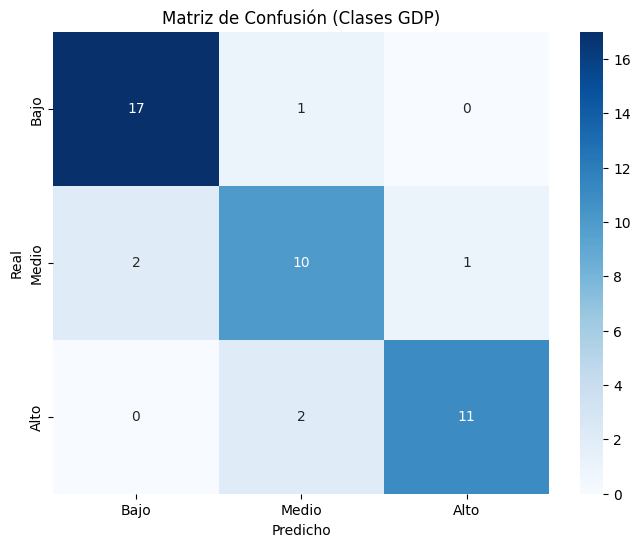

In [ ]:
# Obtener predicciones (probabilidades)
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test_scaled)

# Convertir one-hot a clases numéricas
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.title('Matriz de Confusión (Clases GDP)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


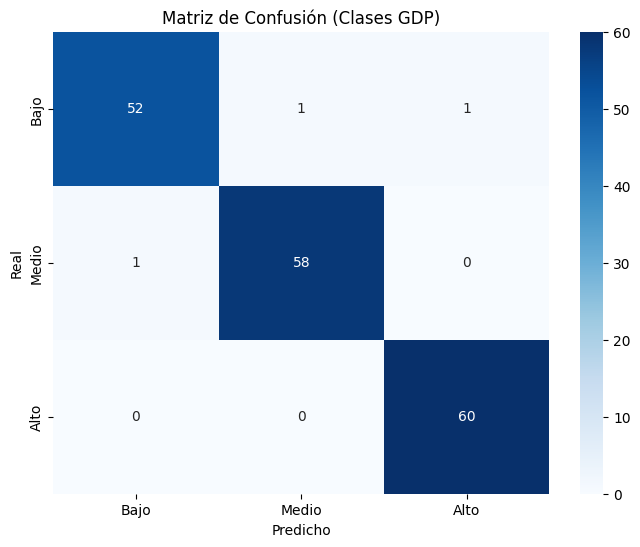

In [ ]:
# Matriz de confusión train
y_pred_prob_train = best_model.predict_proba(X_train_scaled)
y_train_classes = np.argmax(y_train, axis=1)
y_pred_classes_train = np.argmax(y_pred_prob_train, axis=1)

cmt = confusion_matrix(y_train_classes, y_pred_classes_train)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cmt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo', 'Medio', 'Alto'],
            yticklabels=['Bajo', 'Medio', 'Alto'])
plt.title('Matriz de Confusión (Clases GDP)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

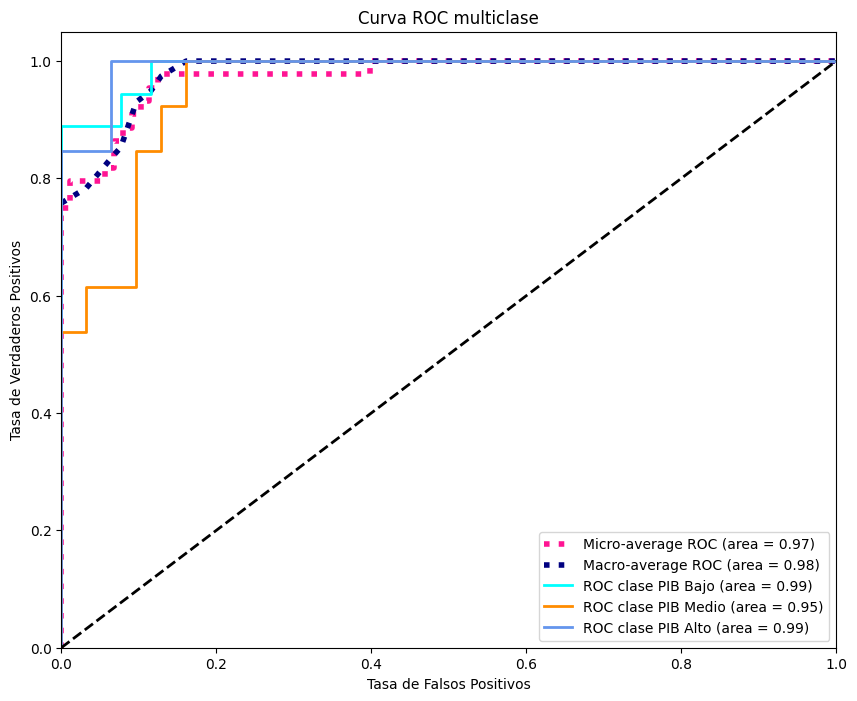

Métricas por Clase:

Clase: PIB Bajo
Accuracy: 0.9318
Specificity: 0.9231
Precision: 0.8947
Recall/Sensitivity: 0.9444
F1-Score: 0.9189

Clase: PIB Medio
Accuracy: 0.8636
Specificity: 0.9032
Precision: 0.7692
Recall/Sensitivity: 0.7692
F1-Score: 0.7692

Clase: PIB Alto
Accuracy: 0.9318
Specificity: 0.9677
Precision: 0.9167
Recall/Sensitivity: 0.8462
F1-Score: 0.8800

Métricas Globales:
Accuracy: 0.8636
Precision: 0.8641
Recall: 0.8636
F1-Score: 0.8632


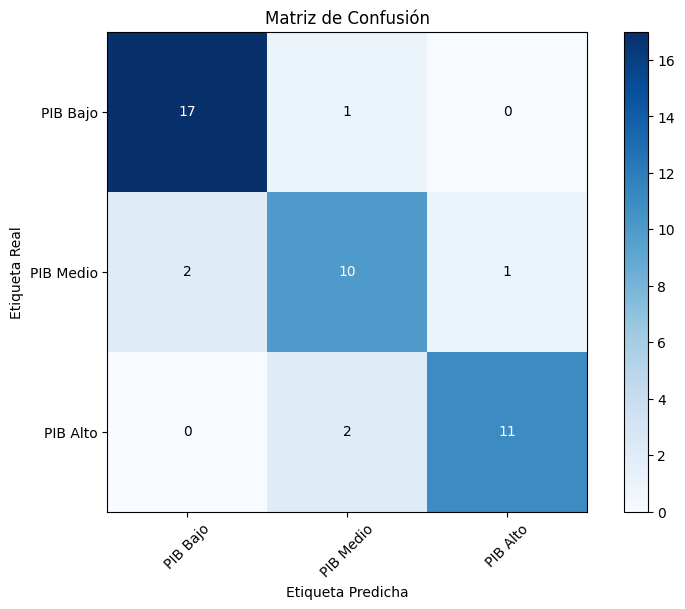

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


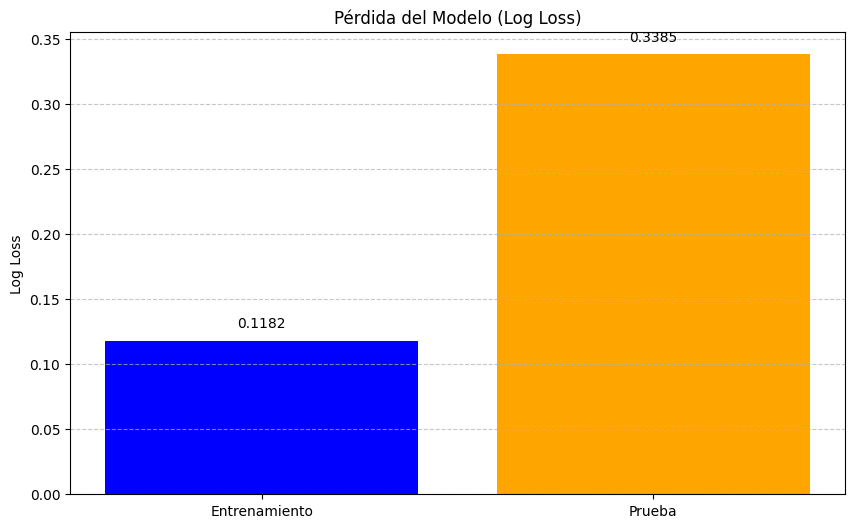

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy.interpolate import interp1d

# Función para graficar la curva ROC para clasificación multiclase
def plot_multiclass_roc(y_test, y_pred_prob, n_classes):
    # Binarizar las etiquetas para ROC
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    # Calcular ROC curve y ROC AUC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular micro-average ROC curve y ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Calcular macro-average ROC curve y ROC area
    # Primero agregamos todos los fpr
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Luego interpolamos tpr para estos puntos
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        if len(fpr[i]) > 1:  # Verificar que hay suficientes puntos para interpolar
            interpolator = interp1d(fpr[i], tpr[i], kind='linear', bounds_error=False, fill_value=(0, 1))
            mean_tpr += interpolator(all_fpr)
        else:
            # Manejar caso donde hay muy pocos puntos
            mean_tpr += np.zeros_like(all_fpr)

    # Finalmente calculamos el promedio y computamos AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Graficar todas las curvas ROC
    plt.figure(figsize=(10, 8))

    # Graficar la curva ROC micro-average
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    # Graficar la curva ROC macro-average
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    # Graficar las curvas ROC para cada clase
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    labels = ['PIB Bajo', 'PIB Medio', 'PIB Alto']

    for i, color, label in zip(range(n_classes), colors, labels):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC clase {label} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC multiclase')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc


# Función para calcular y mostrar métricas de rendimiento
def calculate_performance_metrics(y_true, y_pred):
    # Para clasificación multiclase, primero calculamos la matriz de confusión

    y_train_classes = np.argmax(y_true, axis=1)
    y_pred_classes_train = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_train_classes, y_pred_classes_train)


    # Número de clases
    n_classes = cm.shape[0]

    # Calculamos las métricas para cada clase
    metrics = []
    class_names = ['PIB Bajo', 'PIB Medio', 'PIB Alto']

    for i in range(n_classes):
        # Extraer los valores necesarios de la matriz de confusión para cada clase
        tp = cm[i, i]  # Verdaderos positivos
        fp = cm[:, i].sum() - tp  # Falsos positivos
        fn = cm[i, :].sum() - tp  # Falsos negativos
        tn = cm.sum() - (tp + fp + fn)  # Verdaderos negativos

        # Calcular métricas
        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics.append({
            'Clase': class_names[i],
            'Accuracy': accuracy,
            'Specificity': specificity,
            'Precision': precision,
            'Recall/Sensitivity': recall,
            'F1-Score': f1
        })

    # Calcular métricas globales usando sklearn
    global_accuracy = accuracy_score(y_true, y_pred)
    global_precision = precision_score(y_true, y_pred, average='weighted')
    global_recall = recall_score(y_true, y_pred, average='weighted')
    global_f1 = f1_score(y_true, y_pred, average='weighted')

    # Mostrar métricas por clase
    print("Métricas por Clase:")
    for metric in metrics:
        print(f"\nClase: {metric['Clase']}")
        print(f"Accuracy: {metric['Accuracy']:.4f}")
        print(f"Specificity: {metric['Specificity']:.4f}")
        print(f"Precision: {metric['Precision']:.4f}")
        print(f"Recall/Sensitivity: {metric['Recall/Sensitivity']:.4f}")
        print(f"F1-Score: {metric['F1-Score']:.4f}")

    # Mostrar métricas globales
    print("\nMétricas Globales:")
    print(f"Accuracy: {global_accuracy:.4f}")
    print(f"Precision: {global_precision:.4f}")
    print(f"Recall: {global_recall:.4f}")
    print(f"F1-Score: {global_f1:.4f}")

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Añadir valores en la matriz
    thresh = cm.max() / 2.
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

    return metrics


from sklearn.metrics import log_loss

def plot_sklearn_model_performance(model, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))

    # Obtener probabilidades
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Calcular pérdida logarítmica
    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)

    # Graficar como barras
    plt.bar(['Entrenamiento', 'Prueba'], [train_loss, test_loss], color=['blue', 'orange'])
    plt.title('Pérdida del Modelo (Log Loss)')
    plt.ylabel('Log Loss')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir valores sobre las barras
    for i, v in enumerate([train_loss, test_loss]):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

    plt.show()


# Obtener el mejor modelo de tu GridSearchCV
best_model = grid_search.best_estimator_

# Obtener predicciones
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)

# 1. Para visualizar la curva ROC multiclase:
roc_auc = plot_multiclass_roc(y_test, y_pred_prob, n_classes=3)

# 2. Para calcular y mostrar las métricas de rendimiento:
metrics = calculate_performance_metrics(y_test, y_pred)

# 3. Para visualizar el rendimiento del modelo scikit-learn:
plot_sklearn_model_performance(best_model, X_train_scaled, y_train, X_test_scaled, y_test)

## SEGUNDA RED: DEEP LEARNING

### Entrenamiento y uso del modelo

In [ ]:
# Instalamos las dependencias
!pip install -q tensorflow
!pip install -q keras
!pip install -q keras-tuner
!pip install -q datasets
!pip install -q pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# ======================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ======================
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt  # Para búsqueda de hiperparámetros
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Fijamos una semilla para reproducibilidad
RANDOM_SEED = 77
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ======================
# 2. CONFIGURACIÓN DE HIPERPARÁMETROS
# ======================
# Definimos el rango de valores que puede tomar cada hiperparámetro
HP_RANGES = {
    # Número de capas ocultas (entre 3 y 4)
    'n_layers': {
        'min_value': 3,
        'max_value': 6,
        'step': 1
    },

    # Número de neuronas por capa
    'units': {
        'min_value': 32,
        'max_value': 256,
        'step': 32
    },

    # Tasa de dropout para regularización
    'dropout': {
        'min_value': 0.1,
        'max_value': 0.5,
        'step': 0.1
    },

    # Tasa de aprendizaje del optimizador
    'learning_rate': [0.00005, 0.0001, 0.0005, 0.001],

    # Factor de regularización L2
    'l2_lambda': [0.0001, 0.001, 0.01, 0.05, 0.1],
    # Añadir opciones para el optimizador
    'optimizer': ['adam', 'rmsprop', 'adamw'],
    # Añadir opciones para el tamaño del batch
    'batch_size': [32, 64, 128]
}

# Configuración del entrenamiento
TRAINING_CONFIG = {
    'epochs': 1000,          # Número de pasadas por todo el dataset
    'batch_size': 64,        # Tamaño del lote
    'max_trials': 10        # Número de combinaciones de hiperparámetros a probar
}

# ======================
# 3. DEFINICIÓN DEL MODELO
# ======================
def create_model(hp):
    """
    Función que crea el modelo con los hiperparámetros que se están probando.
    hp: objeto que permite acceder a los hiperparámetros que se están evaluando
    """
    model = keras.Sequential()
    # Decidimos cuántas capas tendrá el modelo
    n_layers = hp.Int('n_layers', **HP_RANGES['n_layers'])

    # Primera capa (capa de entrada)
    model.add(keras.layers.Dense(
        units=hp.Int('units_0', **HP_RANGES['units']),
        input_shape=(75,),  # Asegúrate que esta dimensión coincida con tus datos
        kernel_regularizer=keras.regularizers.l2(
            hp.Choice('l2_0', HP_RANGES['l2_lambda'])
        )
    ))
    # Añadimos capas auxiliares para mejorar el entrenamiento
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(
        hp.Float('dropout_0', **HP_RANGES['dropout'])
    ))

    # Agregamos las capas ocultas adicionales
    for i in range(1, n_layers):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', **HP_RANGES['units']),
            kernel_regularizer=keras.regularizers.l2(
                hp.Choice(f'l2_{i}', HP_RANGES['l2_lambda'])
            )
        ))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.ReLU())
        model.add(keras.layers.Dropout(
            hp.Float(f'dropout_{i}', **HP_RANGES['dropout'])
        ))

    # Capa de salida
    model.add(keras.layers.Dense(3, activation='softmax'))

    # Compilamos el modelo (solo una vez)
    optimizer_name = hp.Choice('optimizer', HP_RANGES['optimizer'])
    learning_rate = hp.Choice('learning_rate', HP_RANGES['learning_rate'])

    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adamw':
        optimizer = keras.optimizers.AdamW(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# ======================
# 5. BÚSQUEDA DE MEJORES HIPERPARÁMETROS
# ======================
# Iniciamos la búsqueda aleatoria de hiperparámetros
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',  # Optimizamos basándonos en la precisión
    max_trials=TRAINING_CONFIG['max_trials'],
    directory='keras_tuner',
    project_name='gdp',
    overwrite=True,
    max_consecutive_failed_trials=5
)

# Configuramos early stopping para evitar sobreajuste
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,  # Esperamos 2 épocas antes de parar
    restore_best_weights=True  # Guardamos los mejores pesos
)

# Realizamos la búsqueda
tuner.search(
    X_train_scaled,
    y_train,
    epochs=TRAINING_CONFIG['epochs'],
    batch_size=TRAINING_CONFIG['batch_size'],
    validation_split=0.2,  # 20% de los datos para validación
    callbacks=[stop_early],
    verbose=1
)

# ======================
# 6. ENTRENAMIENTO DEL MEJOR MODELO
# ======================
# Obtenemos los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters()[0]
print("\n🏆 Mejores hiperparámetros encontrados:")
print("Número de capas:", best_hps.get('n_layers'))
print("Tasa de aprendizaje:", best_hps.get('learning_rate'))

# Entrenamos el modelo final con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=TRAINING_CONFIG['epochs'],
    batch_size=TRAINING_CONFIG['batch_size'],
    validation_split=0.2,
    verbose=1
)

# Evaluamos el modelo final
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n📊 Precisión final en test: {test_acc:.2%}")


Trial 10 Complete [00h 02m 32s]
val_accuracy: 0.8857142925262451

Best val_accuracy So Far: 0.8857142925262451
Total elapsed time: 00h 22m 15s

🏆 Mejores hiperparámetros encontrados:
Número de capas: 5
Tasa de aprendizaje: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.4085 - loss: 7.8677 - val_accuracy: 0.4571 - val_loss: 7.4919
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5106 - loss: 7.4763 - val_accuracy: 0.4857 - val_loss: 7.2536
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6202 - loss: 7.0760 - val_accuracy: 0.5714 - val_loss: 7.0560
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6288 - loss: 6.8605 - val_accuracy: 0.6286 - val_loss: 6.8702
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6687 - loss: 6.6344 - val_accuracy: 0.6286 - val_loss: 6.7036
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7161 - loss: 6.4317 - val_accuracy: 0.6286 - val_loss: 6.5436
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7289 - loss: 6.2786 - val_accuracy: 0.6857 - val_loss: 6.3907
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7434 - loss: 6.1236 - val_accuracy: 0.7143 - 

Notamos que usar GPU puede crear error en este último código, en CPU funciona bien.

### Guardar el modelo

In [ ]:
# GUARDAR EL MODELO EN FORMATO HDF5
best_model.save('modelo.h5')

print("✅ Modelo guardado exitosamente como 'modelo.h5'")

from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
modelo_cargado = load_model('modelo.h5')

print("✅ Modelo cargado y listo para hacer predicciones")

✅ Modelo guardado exitosamente como 'modelo.h5'


✅ Modelo cargado y listo para hacer predicciones


### Gráficas de la segunda red

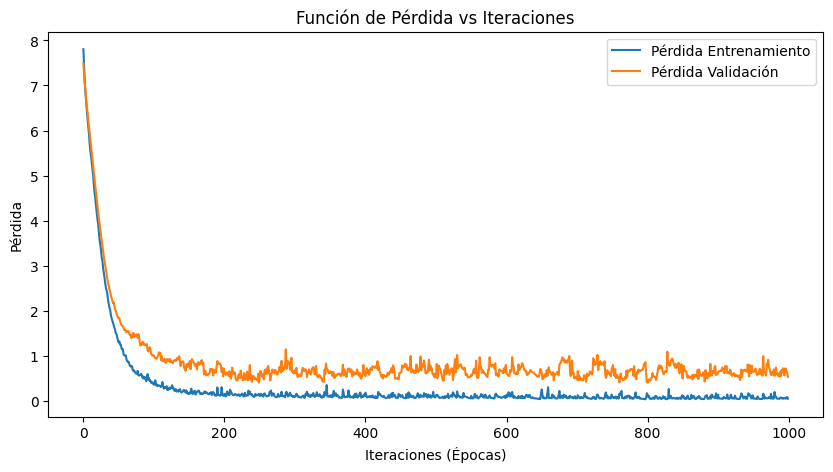

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import tensorflow as tf

# ======================
# 1. FUNCIÓN DE PÉRDIDA POR ITERACIÓN
# ======================
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Iteraciones (Épocas)')
plt.ylabel('Pérdida')
plt.title('Función de Pérdida vs Iteraciones')
plt.legend()
plt.show()

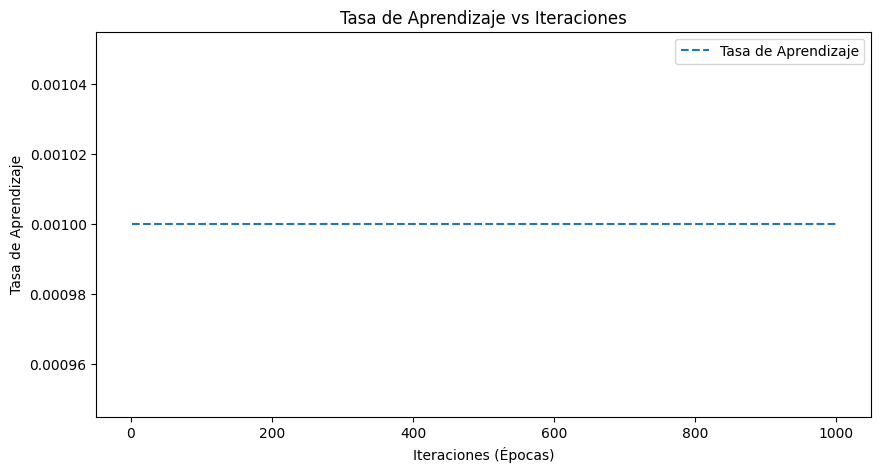

In [ ]:
# ======================
# 2. TASA DE APRENDIZAJE
# ======================
epochs = range(1, len(history.history['loss']) + 1)
tasa_aprendizaje = [best_hps.get('learning_rate')] * len(epochs)
plt.figure(figsize=(10, 5))
plt.plot(epochs, tasa_aprendizaje, label='Tasa de Aprendizaje', linestyle='--')
plt.xlabel('Iteraciones (Épocas)')
plt.ylabel('Tasa de Aprendizaje')
plt.title('Tasa de Aprendizaje vs Iteraciones')
plt.legend()
plt.show()

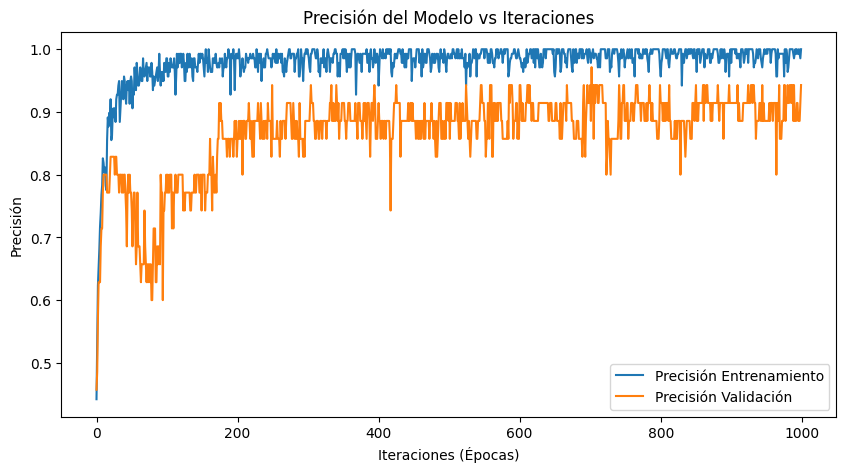

In [ ]:
# ======================
# 3. PRECISIÓN DEL MODELO
# ======================
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Iteraciones (Épocas)')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo vs Iteraciones')
plt.legend()
plt.show()

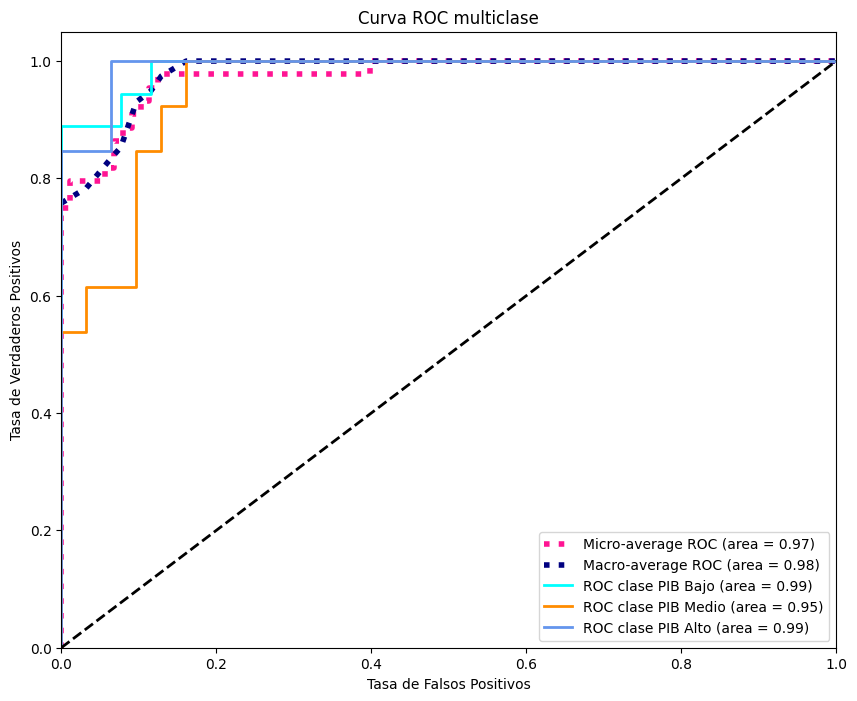

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy.interpolate import interp1d

# Función para graficar la curva ROC para clasificación multiclase
def plot_multiclass_roc(y_test, y_pred_prob, n_classes):
    # Binarizar las etiquetas para ROC
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    # Calcular ROC curve y ROC AUC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular micro-average ROC curve y ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Calcular macro-average ROC curve y ROC area
    # Primero agregamos todos los fpr
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Luego interpolamos tpr para estos puntos
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        if len(fpr[i]) > 1:  # Verificar que hay suficientes puntos para interpolar
            interpolator = interp1d(fpr[i], tpr[i], kind='linear', bounds_error=False, fill_value=(0, 1))
            mean_tpr += interpolator(all_fpr)
        else:
            # Manejar caso donde hay muy pocos puntos
            mean_tpr += np.zeros_like(all_fpr)

    # Finalmente calculamos el promedio y computamos AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Graficar todas las curvas ROC
    plt.figure(figsize=(10, 8))

    # Graficar la curva ROC micro-average
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    # Graficar la curva ROC macro-average
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    # Graficar las curvas ROC para cada clase
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    labels = ['PIB Bajo', 'PIB Medio', 'PIB Alto']

    for i, color, label in zip(range(n_classes), colors, labels):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC clase {label} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC multiclase')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

    # Visualizar curva ROC
roc_auc = plot_multiclass_roc(y_test, y_pred_prob, 3)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


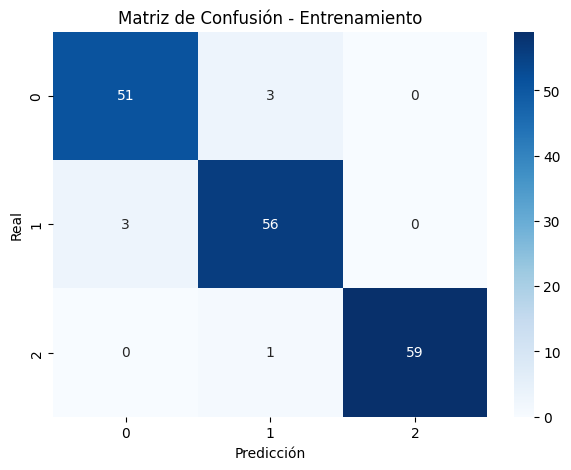

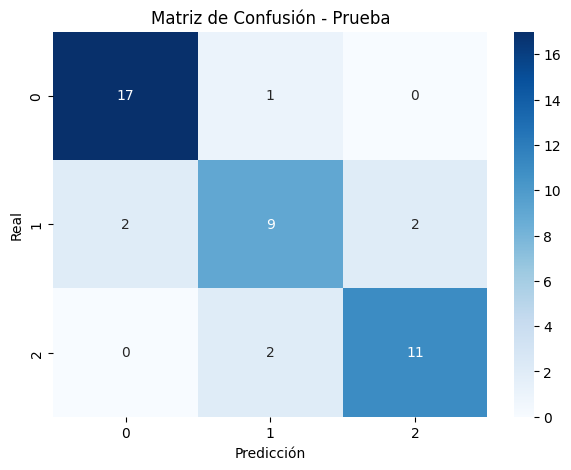

In [ ]:
# ======================
# 5. MATRIZ DE CONFUSIÓN
# ======================
def plot_confusion_matrix(y_true, y_pred, title='Matriz de Confusión'):
    # Convert y_true to multiclass if it's in multilabel-indicator format
    if y_true.ndim > 1 and y_true.shape[1] > 1:  # Check if multilabel-indicator
        y_true = np.argmax(y_true, axis=1)  # Convert to multiclass

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()

# Predicciones en entrenamiento y prueba
y_train_pred = np.argmax(best_model.predict(X_train_scaled), axis=1)
y_test_pred = np.argmax(best_model.predict(X_test_scaled), axis=1)

plot_confusion_matrix(y_train, y_train_pred, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix(y_test, y_test_pred, title='Matriz de Confusión - Prueba')


## TERCER RED: RED PROFUNDA CON FUNCIÓN DE PÉRDIDA INCORRECTA

Comparación de dos modelos con la misma configuración, a excepción de la función de pérdida.

### Creación y entrenamiento de los modelos a comparar

=== ENTRENANDO MODELO CON FUNCIÓN DE PÉRDIDA INCORRECTA ===
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.3667 - loss: 2.6928 - val_accuracy: 0.3429 - val_loss: 2.3908
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3988 - loss: 2.4645 - val_accuracy: 0.6571 - val_loss: 2.3134
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5181 - loss: 2.3594 - val_accuracy: 0.7429 - val_loss: 2.2545
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5488 - loss: 2.2811 - val_accuracy: 0.7429 - val_loss: 2.2022
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5689 - loss: 2.2010 - val_accuracy: 0.7714 - val_loss: 2.1549
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6305 - loss: 2.1484 - val_accuracy: 0.7714 - val_loss: 2.1117
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6935 - loss: 2.0569 - val_accuracy: 0.7429 - val_loss: 2.0713
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7250 - loss: 2.0090 - val_accuracy: 0.7429 - val_loss: 2.0339
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.4289 - loss: 2.9516 - val_accuracy: 0.3714 - val_loss: 2.8206
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4643 - loss: 2.8522 - val_accuracy: 0.5429 - val_loss: 2.7250
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5485 - loss: 2.7226 - val_accuracy: 0.6857 - val_loss: 2.6537
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5842 - loss: 2.5883 - val_accuracy: 0.6857 - val_loss: 2.5956
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6447 - loss: 2.4928 - val_accuracy: 0.6571 - val_loss: 2.5448
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6913 - loss: 2.4721 - val_accuracy: 0.6571 - val_loss: 2.5011
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7044 - loss: 2.4327 - val_accuracy: 0.6571 - val_loss: 2.4605
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7158 - loss: 2.3690 - val_accuracy: 0.6571 - val_loss: 2.4233
Epo

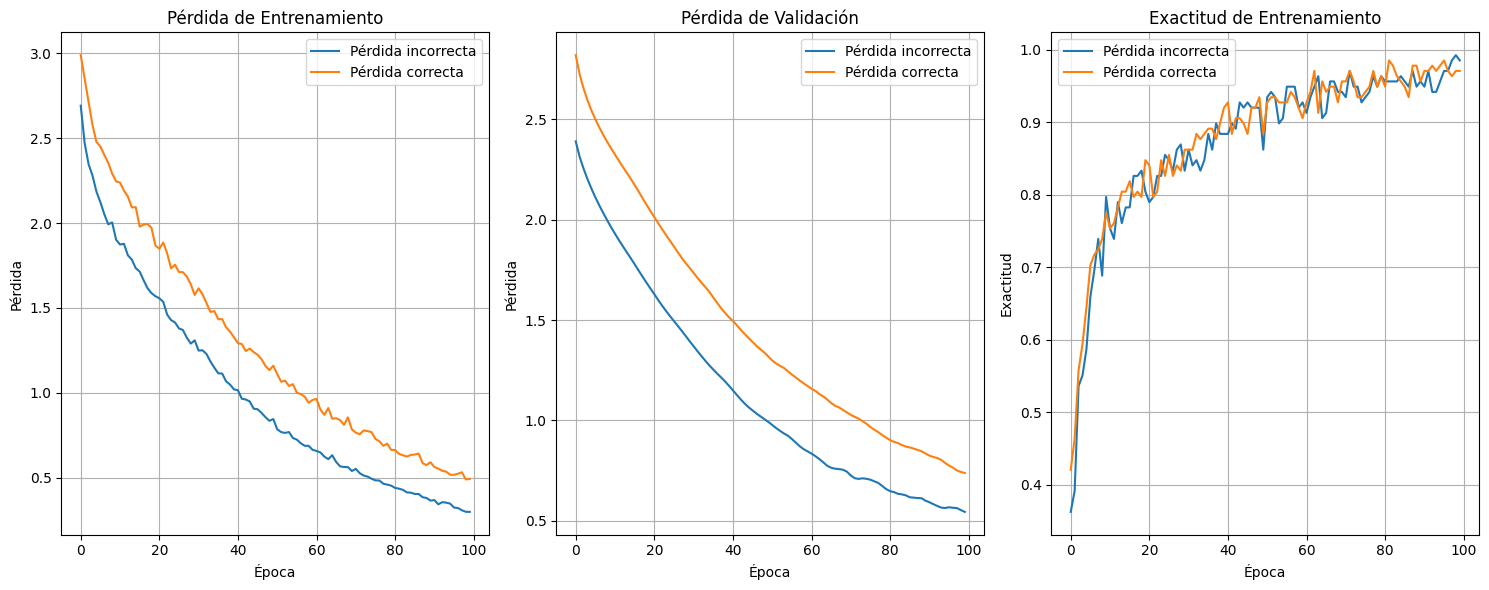

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step


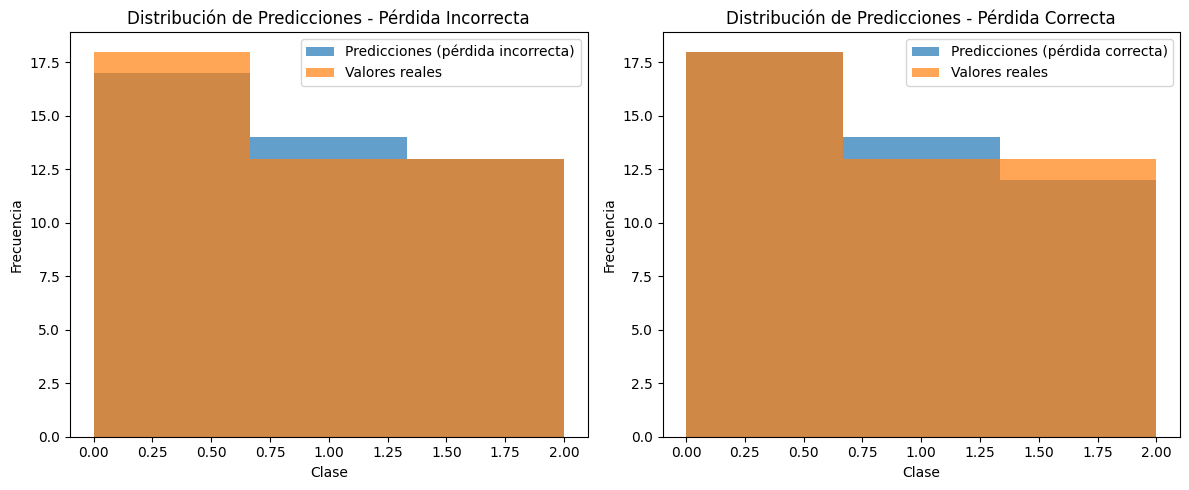

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fijamos una semilla para reproducibilidad
RANDOM_SEED = 77
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Función de pérdida personalizada incorrecta
# Combinación de MSE (inadecuada para clasificación) + KL Divergence
def custom_classification_loss(y_true, y_pred):
    # MSE - inadecuado para clasificación
    loss_ce = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
    # KL Divergence con peso inadecuado
    loss_kl = tf.keras.losses.KLDivergence()(y_true, y_pred)
    # Combinación con pesos incorrectos
    return loss_ce + 0.4 * loss_kl

# Configuración común para ambos modelos
MODEL_CONFIG = {
    'learning_rate': 0.001,
    'epochs': 100,
    'batch_size': 64,
    'l2_lambda': 0.01
}

# Crear una red neuronal con la misma arquitectura pero función de pérdida diferente
def create_model(input_shape, num_classes, use_correct_loss=True):
    # NO usamos la normalización como primera capa, en su lugar haremos pre-procesamiento
    model = keras.Sequential([
        keras.layers.Dense(128, input_shape=(input_shape,),
                          kernel_regularizer=keras.regularizers.l2(MODEL_CONFIG['l2_lambda'])),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64,
                          kernel_regularizer=keras.regularizers.l2(MODEL_CONFIG['l2_lambda'])),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Mismo learning rate para ambos modelos
    optimizer = keras.optimizers.Adam(learning_rate=MODEL_CONFIG['learning_rate'])

    # La única diferencia: la función de pérdida
    if use_correct_loss:
        loss_function = 'categorical_crossentropy'  # Correcto para clasificación multiclase
    else:
        loss_function = custom_classification_loss  # Incorrecto

    model.compile(
        optimizer=optimizer,
        loss=loss_function,
        metrics=['accuracy']
    )

    return model

# Función para entrenar y evaluar el modelo
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Early stopping para ambos modelos
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Entrenar con validación
    history = model.fit(
        X_train, y_train,
        epochs=MODEL_CONFIG['epochs'],
        batch_size=MODEL_CONFIG['batch_size'],
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluar
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"{model_name} - Test accuracy: {test_acc:.4f}")

    return history

# Función principal para comparar modelos
def compare_models(X_train_scaled, y_train, X_test_scaled, y_test):
    input_shape = X_train_scaled.shape[1]
    num_classes = y_train.shape[1]  # Asumiendo one-hot encoding

    print("=== ENTRENANDO MODELO CON FUNCIÓN DE PÉRDIDA INCORRECTA ===")
    bad_model = create_model(input_shape, num_classes, use_correct_loss=False)
    bad_history = train_and_evaluate(bad_model, X_train_scaled, y_train, X_test_scaled, y_test, "Modelo con pérdida incorrecta")

    print("\n=== ENTRENANDO MODELO CON FUNCIÓN DE PÉRDIDA CORRECTA ===")
    good_model = create_model(input_shape, num_classes, use_correct_loss=True)
    good_history = train_and_evaluate(good_model, X_train_scaled, y_train, X_test_scaled, y_test, "Modelo con pérdida correcta")

    # Comparar resultados
    plt.figure(figsize=(15, 6))

    # Comparar pérdida de entrenamiento
    plt.subplot(1, 3, 1)
    plt.plot(bad_history.history['loss'], label='Pérdida incorrecta')
    plt.plot(good_history.history['loss'], label='Pérdida correcta')
    plt.title('Pérdida de Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Comparar pérdida de validación
    plt.subplot(1, 3, 2)
    plt.plot(bad_history.history['val_loss'], label='Pérdida incorrecta')
    plt.plot(good_history.history['val_loss'], label='Pérdida correcta')
    plt.title('Pérdida de Validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Comparar exactitud
    plt.subplot(1, 3, 3)
    plt.plot(bad_history.history['accuracy'], label='Pérdida incorrecta')
    plt.plot(good_history.history['accuracy'], label='Pérdida correcta')
    plt.title('Exactitud de Entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Realizar predicciones y mostrar evaluación final
    y_pred_bad = bad_model.predict(X_test_scaled)
    y_pred_good = good_model.predict(X_test_scaled)

    # Convertir probabilities a clases
    y_pred_bad_classes = np.argmax(y_pred_bad, axis=1)
    y_pred_good_classes = np.argmax(y_pred_good, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Comparar distribución de predicciones
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(y_pred_bad_classes, bins=3, alpha=0.7, label='Predicciones (pérdida incorrecta)')
    plt.hist(y_test_classes, bins=3, alpha=0.7, label='Valores reales')
    plt.title('Distribución de Predicciones - Pérdida Incorrecta')
    plt.xlabel('Clase')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(y_pred_good_classes, bins=3, alpha=0.7, label='Predicciones (pérdida correcta)')
    plt.hist(y_test_classes, bins=3, alpha=0.7, label='Valores reales')
    plt.title('Distribución de Predicciones - Pérdida Correcta')
    plt.xlabel('Clase')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return bad_model, good_model

bad_model, good_model = compare_models(X_train_scaled, y_train, X_test_scaled, y_test)


### Resultados esperados de los dos modelos (correcta e incorrecta) (vemos abajo que no ocurrió lo esperado):
Al usar la función de pérdida incorrecta (MSE + KL Divergence), se esperan los siguientes problemas:
1. Convergencia más lenta: La función MSE no está diseñada para problemas de clasificación, por lo que el gradiente no será óptimo para actualizar los pesos de la red.
2. Menor exactitud final: El modelo con la función incorrecta probablemente quedará atrapado en un mínimo local subóptimo.
3. Comportamiento errático durante el entrenamiento: Podrían verse oscilaciones más pronunciadas en la curva de pérdida debido a la penalización inadecuada para clasificación.
4. Posible sesgo en las predicciones: El modelo podría tender a favorecer ciertas clases debido a la penalización no uniforme de errores en una función no diseñada para clasificación.

Por otro lado, el modelo con categorical_crossentropy debería mostrar:
1. Convergencia más rápida y estable
2. Mayor exactitud final
3. Mejor equilibrio en la clasificación de las diferentes clases
4. Curva de pérdida más suave y descendente

La función categorical_crossentropy está diseñada específicamente para medir la diferencia entre distribuciones de probabilidad en problemas de clasificación multiclase, lo que la hace matemáticamente adecuada para este tipo de problema.

### Análisis de gráficos de pérdida y exactitud

Al analizar estas gráficas de entrenamiento de redes neuronales, se hace una comparación entre dos modelos: uno con una función de pérdida "incorrecta" (línea azul) y otro con una función de pérdida "correcta" (línea naranja).

En las tres gráficas se observa:

1. **Pérdida de Entrenamiento (izquierda)**:
   - La pérdida del modelo con función incorrecta (azul) disminuye más rápidamente y alcanza valores más bajos (\~0.3) que el modelo con función correcta (\~0.5) al final del entrenamiento.
   - Esto sugiere que el modelo con función incorrecta aparentemente se está ajustando mejor a los datos de entrenamiento.

2. **Pérdida de Validación (centro)**:
   - Similar a la pérdida de entrenamiento, la función incorrecta muestra valores más bajos (\~0.5) que la correcta (\~0.8) al final del entrenamiento.
   - Esto parece contradictorio con lo esperado, ya que normalmente esperaríamos que una función de pérdida correcta funcionara mejor.

3. **Exactitud de Entrenamiento (derecha)**:
   - Ambos modelos alcanzan niveles similares de exactitud (cercanos al 95-97%).
   - No hay una diferencia significativa entre ambos modelos en términos de exactitud, a pesar de las diferencias en las funciones de pérdida.

Estos resultados son interesantes porque normalmente esperaríamos que la función de pérdida "correcta" (que probablemente sea categorical_crossentropy para un problema de clasificación) funcionara mejor. Sin embargo, aquí vemos que:

1. La función incorrecta está produciendo valores de pérdida más bajos tanto en entrenamiento como en validación.
2. A pesar de esto, ambos modelos alcanzan una exactitud similar.

Esto podría explicarse por:
- Las escalas de las diferentes funciones de pérdida son distintas, por lo que no son directamente comparables.
- La función incorrecta (posiblemente MSE + KL Divergence) podría estar optimizando para minimizar un valor numérico que no se traduce necesariamente en mejor rendimiento clasificatorio.
- La similitud en la exactitud sugiere que, aunque las pérdidas sean diferentes, ambos modelos están tomando decisiones de clasificación similares.

### Análisis de gráficos de distribución de predicciones

#### Interpretación de este tipo de gráficas

En estas gráficas de distribución de predicciones:

Las barras color café (marrón) representan los valores donde coinciden tanto las predicciones del modelo como los valores reales. Es decir, son las áreas de superposición entre las predicciones y los valores reales.
Las áreas naranjas representan los valores reales que no fueron correctamente predichos por el modelo.
Las áreas azules representan predicciones del modelo que no corresponden a valores reales en esa clase.

La forma en que se construyen estos histogramas es superponiendo las distribuciones, por lo que:

* Donde hay color café, significa que hay acuerdo entre las predicciones y los valores reales
* Donde solo hay naranja, hay valores reales que el modelo no predijo para esa clase
* Donde solo hay azul, hay predicciones incorrectas que el modelo asignó a esa clase

#### Análisis del caso

Al analizar las dos gráficas de distribución de predicciones, se puede ver una comparación importante entre los dos modelos (con pérdida incorrecta y pérdida correcta) en términos de cómo clasifican los datos en comparación con los valores reales.

**Distribución de Predicciones - Pérdida Incorrecta (izquierda)**:
- Se observa que los valores reales (barras naranjas) parecen estar distribuidos principalmente en las clases 0 y 2
- Las predicciones del modelo con pérdida incorrecta (barras azules) muestran una concentración en la clase 1, que no coincide bien con la distribución real
- Hay una clara discrepancia entre la distribución de predicciones y los valores reales, especialmente en la clase 1 donde el modelo predice muchos más casos de los que realmente existen

**Distribución de Predicciones - Pérdida Correcta (derecha)**:
- La distribución de predicciones (barras azules) con el modelo de pérdida correcta sigue mucho más fielmente la distribución de los valores reales
- Aunque sigue habiendo algunas diferencias, especialmente en la clase 1, la correspondencia es mucho mejor
- El modelo con pérdida correcta parece capturar mejor la estructura de los datos reales

Estas gráficas revelan algo muy importante que no era visible en las gráficas anteriores: **aunque ambos modelos tenían una exactitud similar, la distribución de sus predicciones es muy diferente**.

La interpretación completa, considerando tanto estas gráficas como las anteriores, sería:

1. A pesar de que el modelo con pérdida incorrecta mostraba valores numéricos de pérdida más bajos y una exactitud similar al modelo correcto, está haciendo predicciones con una distribución sesgada que no representa bien los datos reales.

2. El modelo con pérdida correcta (probablemente categorical_crossentropy) está generando predicciones cuya distribución se asemeja mucho más a la distribución real de las clases, lo que lo hace más confiable y representativo.

3. Este es un claro ejemplo de por qué es importante usar la función de pérdida adecuada para cada tipo de problema. La función de pérdida incorrecta puede optimizar para valores numéricos más bajos, pero no necesariamente captura la estructura real de los datos.

4. La exactitud similar entre ambos modelos podría estar ocultando problemas de sesgo en la clasificación, que se hacen evidentes al analizar la distribución de predicciones.

En resumen, el modelo con la función de pérdida correcta está haciendo un trabajo significativamente mejor al representar la distribución real de los datos, lo que lo hace más confiable para aplicaciones prácticas, incluso si los valores numéricos de pérdida y exactitud sugerían que ambos modelos tenían un rendimiento similar.

### Gráficos y resultados por separado


In [ ]:
# Evaluar y mostrar accuracy de ambos modelos

def evaluate_models(bad_model, good_model, X_test, y_test):
    # Evaluación del modelo con pérdida incorrecta
    loss_bad, acc_bad = bad_model.evaluate(X_test, y_test, verbose=0)

    # Evaluación del modelo con pérdida correcta
    loss_good, acc_good = good_model.evaluate(X_test, y_test, verbose=0)

    # Mostrar resultados
    print("===== RESULTADOS DE EVALUACIÓN =====")
    print(f"Modelo con pérdida incorrecta:")
    print(f"- Accuracy: {acc_bad:.4f}")
    print(f"- Loss: {loss_bad:.4f}")
    print("\nModelo con pérdida correcta:")
    print(f"- Accuracy: {acc_good:.4f}")
    print(f"- Loss: {loss_good:.4f}")

    # Calculando diferencia porcentual en accuracy
    diff = (acc_good - acc_bad) / acc_bad * 100
    print(f"\nDiferencia en accuracy: {abs(diff):.2f}% {'mejor' if diff > 0 else 'peor'} para el modelo con pérdida correcta")

    return acc_bad, acc_good, loss_bad, loss_good

acc_bad, acc_good, loss_bad, loss_good = evaluate_models(bad_model, good_model, X_test_scaled, y_test)

===== RESULTADOS DE EVALUACIÓN =====
Modelo con pérdida incorrecta:
- Accuracy: 0.7955
- Loss: 0.4749

Modelo con pérdida correcta:
- Accuracy: 0.8409
- Loss: 0.7307

Diferencia en accuracy: 5.71% mejor para el modelo con pérdida correcta


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
===== MÉTRICAS DE EVALUACIÓN =====
Modelo con pérdida incorrecta:
- Accuracy en entrenamiento: 0.9017
- Accuracy en prueba: 0.7955

Modelo con pérdida correcta:
- Accuracy en entrenamiento: 0.9364
- Accuracy en prueba: 0.8409


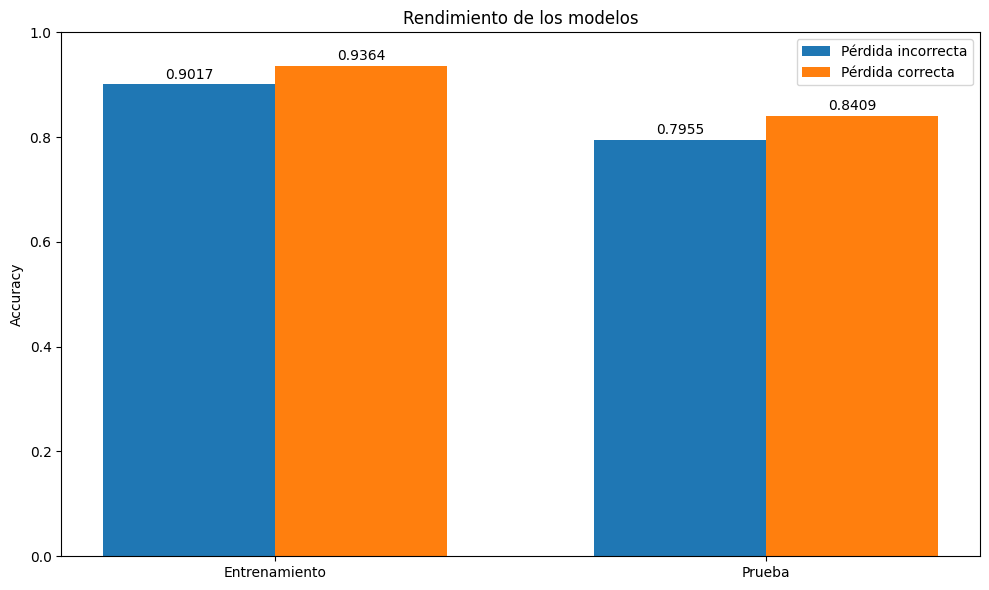

In [ ]:
# Visualizar rendimiento de los modelos

def evaluate_and_visualize_models(bad_model, good_model, X_train, y_train, X_test, y_test):
    # Hacer predicciones en los conjuntos de datos
    y_pred_train_bad = bad_model.predict(X_train)
    y_pred_train_good = good_model.predict(X_train)
    y_pred_test_bad = bad_model.predict(X_test)
    y_pred_test_good = good_model.predict(X_test)

    # Convertir a clases
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    y_pred_train_bad_classes = np.argmax(y_pred_train_bad, axis=1)
    y_pred_train_good_classes = np.argmax(y_pred_train_good, axis=1)
    y_pred_test_bad_classes = np.argmax(y_pred_test_bad, axis=1)
    y_pred_test_good_classes = np.argmax(y_pred_test_good, axis=1)

    # Calcular métricas
    from sklearn.metrics import accuracy_score, log_loss

    # Accuracy
    acc_train_bad = accuracy_score(y_train_classes, y_pred_train_bad_classes)
    acc_train_good = accuracy_score(y_train_classes, y_pred_train_good_classes)
    acc_test_bad = accuracy_score(y_test_classes, y_pred_test_bad_classes)
    acc_test_good = accuracy_score(y_test_classes, y_pred_test_good_classes)

    # Mostrar resultados
    print("===== MÉTRICAS DE EVALUACIÓN =====")
    print("Modelo con pérdida incorrecta:")
    print(f"- Accuracy en entrenamiento: {acc_train_bad:.4f}")
    print(f"- Accuracy en prueba: {acc_test_bad:.4f}")
    print("\nModelo con pérdida correcta:")
    print(f"- Accuracy en entrenamiento: {acc_train_good:.4f}")
    print(f"- Accuracy en prueba: {acc_test_good:.4f}")

    # Visualizar los resultados
    metrics = {
        'Entrenamiento': [acc_train_bad, acc_train_good],
        'Prueba': [acc_test_bad, acc_test_good]
    }

    # Crear gráfica de barras
    plt.figure(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, [metrics[k][0] for k in metrics], width, label='Pérdida incorrecta')
    plt.bar(x + width/2, [metrics[k][1] for k in metrics], width, label='Pérdida correcta')

    plt.ylabel('Accuracy')
    plt.title('Rendimiento de los modelos')
    plt.xticks(x, metrics.keys())
    plt.legend()
    plt.ylim(0, 1)

    # Añadir valores encima de las barras
    for i, v in enumerate([metrics[k][0] for k in metrics]):
        plt.text(i - width/2, v + 0.01, f'{v:.4f}', ha='center')

    for i, v in enumerate([metrics[k][1] for k in metrics]):
        plt.text(i + width/2, v + 0.01, f'{v:.4f}', ha='center')

    plt.tight_layout()
    plt.show()

evaluate_and_visualize_models(bad_model, good_model, X_train_scaled, y_train, X_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


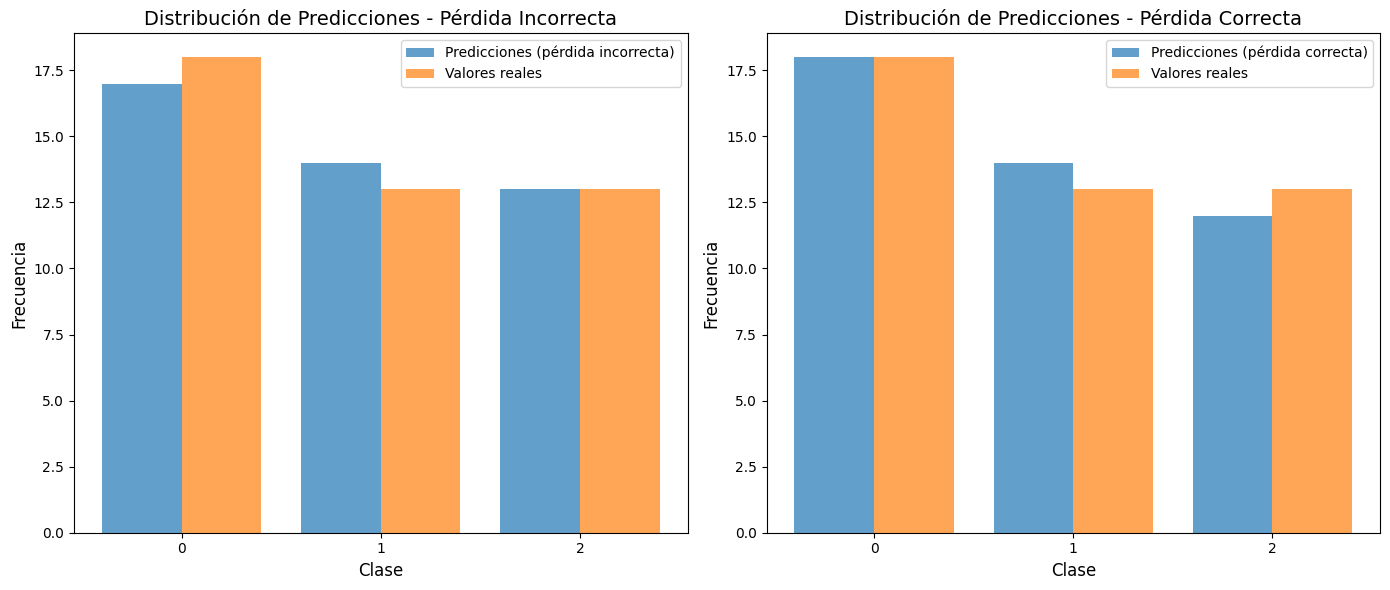

===== ANÁLISIS POR CLASE =====

Modelo con pérdida incorrecta:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.64      0.69      0.67        13
           2       0.85      0.85      0.85        13

    accuracy                           0.80        44
   macro avg       0.79      0.79      0.79        44
weighted avg       0.80      0.80      0.80        44


Modelo con pérdida correcta:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.71      0.77      0.74        13
           2       0.92      0.85      0.88        13

    accuracy                           0.84        44
   macro avg       0.84      0.83      0.84        44
weighted avg       0.85      0.84      0.84        44



In [ ]:
# Visualizar distribución de predicciones

def plot_prediction_distributions(bad_model, good_model, X_test, y_test):
    # Obtener predicciones
    y_pred_bad = bad_model.predict(X_test)
    y_pred_good = good_model.predict(X_test)

    # Convertir a clases
    y_pred_bad_classes = np.argmax(y_pred_bad, axis=1)
    y_pred_good_classes = np.argmax(y_pred_good, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Obtener número de clases
    num_classes = y_test.shape[1]

    # Crear figura con 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. Distribución para modelo con pérdida incorrecta
    axes[0].hist([y_pred_bad_classes, y_test_classes], bins=np.arange(num_classes+1)-0.5,
                alpha=0.7, label=['Predicciones (pérdida incorrecta)', 'Valores reales'])
    axes[0].set_title('Distribución de Predicciones - Pérdida Incorrecta', fontsize=14)
    axes[0].set_xlabel('Clase', fontsize=12)
    axes[0].set_ylabel('Frecuencia', fontsize=12)
    axes[0].set_xticks(range(num_classes))
    axes[0].legend(fontsize=10)

    # 2. Distribución para modelo con pérdida correcta
    axes[1].hist([y_pred_good_classes, y_test_classes], bins=np.arange(num_classes+1)-0.5,
                alpha=0.7, label=['Predicciones (pérdida correcta)', 'Valores reales'])
    axes[1].set_title('Distribución de Predicciones - Pérdida Correcta', fontsize=14)
    axes[1].set_xlabel('Clase', fontsize=12)
    axes[1].set_ylabel('Frecuencia', fontsize=12)
    axes[1].set_xticks(range(num_classes))
    axes[1].legend(fontsize=10)

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

    # Métricas adicionales para cada clase
    print("===== ANÁLISIS POR CLASE =====")

    # Para cada clase, mostrar precisión y recall
    from sklearn.metrics import classification_report

    print("\nModelo con pérdida incorrecta:")
    print(classification_report(y_test_classes, y_pred_bad_classes))

    print("\nModelo con pérdida correcta:")
    print(classification_report(y_test_classes, y_pred_good_classes))

plot_prediction_distributions(bad_model, good_model, X_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


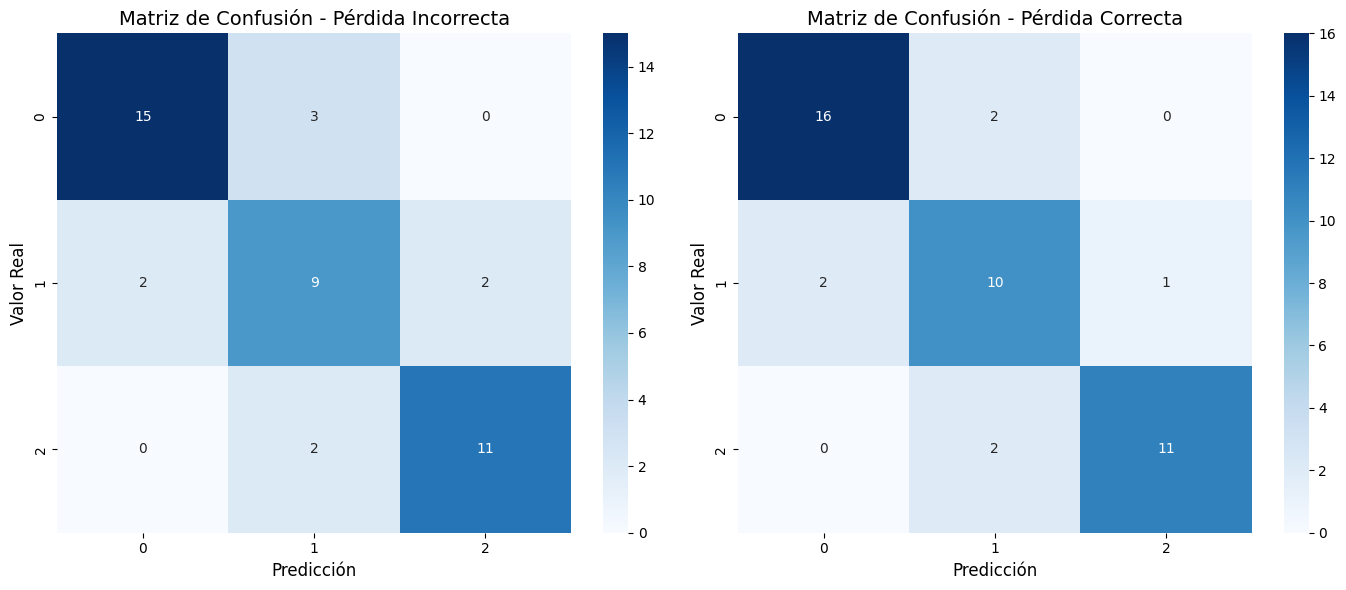


Clase 0:
  Modelo con pérdida incorrecta: 0.8333 (15/18)
  Modelo con pérdida correcta:   0.8889 (16/18)

Clase 1:
  Modelo con pérdida incorrecta: 0.6923 (9/13)
  Modelo con pérdida correcta:   0.7692 (10/13)

Clase 2:
  Modelo con pérdida incorrecta: 0.8462 (11/13)
  Modelo con pérdida correcta:   0.8462 (11/13)


In [ ]:
# Visualizar matrices de confusión

def plot_confusion_matrices(bad_model, good_model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Obtener predicciones
    y_pred_bad = bad_model.predict(X_test)
    y_pred_good = good_model.predict(X_test)

    # Convertir a clases
    y_pred_bad_classes = np.argmax(y_pred_bad, axis=1)
    y_pred_good_classes = np.argmax(y_pred_good, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Obtener número de clases
    num_classes = y_test.shape[1]

    # Crear figura con 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. Matriz de confusión para modelo con pérdida incorrecta
    cm_bad = confusion_matrix(y_test_classes, y_pred_bad_classes)
    sns.heatmap(cm_bad, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Matriz de Confusión - Pérdida Incorrecta', fontsize=14)
    axes[0].set_xlabel('Predicción', fontsize=12)
    axes[0].set_ylabel('Valor Real', fontsize=12)
    axes[0].set_xticks(np.arange(num_classes) + 0.5)
    axes[0].set_yticks(np.arange(num_classes) + 0.5)
    axes[0].set_xticklabels(range(num_classes))
    axes[0].set_yticklabels(range(num_classes))

    # 2. Matriz de confusión para modelo con pérdida correcta
    cm_good = confusion_matrix(y_test_classes, y_pred_good_classes)
    sns.heatmap(cm_good, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title('Matriz de Confusión - Pérdida Correcta', fontsize=14)
    axes[1].set_xlabel('Predicción', fontsize=12)
    axes[1].set_ylabel('Valor Real', fontsize=12)
    axes[1].set_xticks(np.arange(num_classes) + 0.5)
    axes[1].set_yticks(np.arange(num_classes) + 0.5)
    axes[1].set_xticklabels(range(num_classes))
    axes[1].set_yticklabels(range(num_classes))

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

    # Calcular accuracy por clase
    for i in range(num_classes):
        print(f"\nClase {i}:")

        # Modelo con pérdida incorrecta
        mask_real = (y_test_classes == i)
        correct_bad = sum((y_pred_bad_classes == i) & mask_real)
        total_real = sum(mask_real)
        accuracy_bad = correct_bad / total_real if total_real > 0 else 0

        # Modelo con pérdida correcta
        correct_good = sum((y_pred_good_classes == i) & mask_real)
        accuracy_good = correct_good / total_real if total_real > 0 else 0

        print(f"  Modelo con pérdida incorrecta: {accuracy_bad:.4f} ({correct_bad}/{total_real})")
        print(f"  Modelo con pérdida correcta:   {accuracy_good:.4f} ({correct_good}/{total_real})")

plot_confusion_matrices(bad_model, good_model, X_test_scaled, y_test)